# Prediction of the survival for patients with breast cancer

This repository is the fruit of the collaborative work of **Eloi Ancellin**, **Maxime Bouthors**, **Joël Garde**, **Mathieu Juttet**, and **Louis-Oscar Morel**.

It was created as an assignement of the Data Camp course of the Master 2 Data Science of the Polytechnic Institute of Paris during the year 2021.



## Breast Cancer ; An introduction

Breast cancer is the most common cancer for women, with over 2 million new cases worldwide annually, according to the WHO. It alone is responsible for more than 500,000 deaths per year and nearly one in seven women will develop this disease in her lifetime. Breast cancer is detected by mammography, but it is the pathological examination of the tissues taken from the patient (biopsy) that makes it possible to establish the precise diagnosis of breast cancer.



The pathological examination is performed by a pathologist performing a microscopic analysis of a biopsy of the lesion. Pathology analysis is a complex process, **the challenge of which is to be able to offer the best treatment to each patient, thereby improving her chances of survival**. Therefore, the pathologist's role is to characterize the tumor so that the oncologist can give the best medicine. The diagnosis is based on the microscopic analysis of the lesion. 

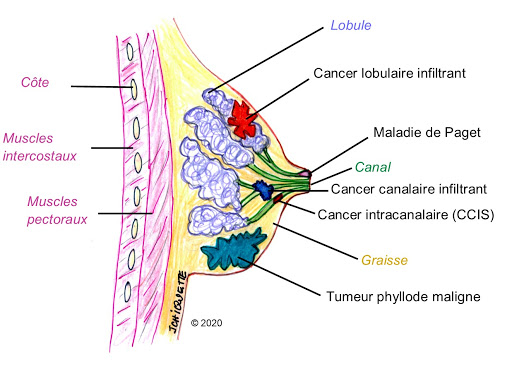

## Key concepts to understand the work that needs to be done

### Histological Classification

The histological classification depends on the anatomical origin of the cancer, its shape and its overflow outside its original location. The two most common histological types are:
* Ductal carcinomas;
* Lobular carcinomas; 

However, there are over 25 other different types of breast cancer, each with its own specific characteristics. This anatomopathological examination is based on the analysis of cell types, their relationships, and whether or not the overall architecture of the tissue is respected.

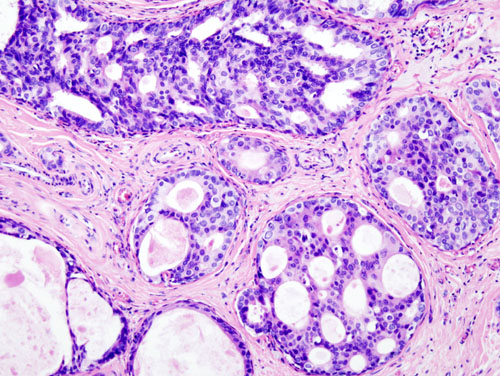

In situ ductal carcinoma : the lesion is contained at the level of the epithelium (surface of the mammary duct). The cancer is not disseminated, the prognosis is better than an invasive ductal carcinoma, which can cause metastases.

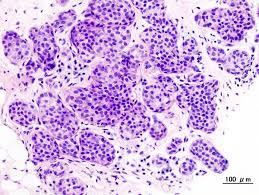

Invasive lobular carcinoma : The general morphology is very different from that of ductal carcinoma. This difference is explained by the shape of the cells, their relationships and the overall architecture of the tissue. Intricately, the interior of cells is also different. The genes expressed are not the same, the biological molecules do not have the same functionalities, this cancer does not have the same characteristics and is therefore not associated with the same chances of survival.

### Molecular Biology 

**The aim of this project is to find profiles of patients with characteristics associated with a good or bad survival.**

The biology of cancer is complex. In this challenge, we will focus on (i) clinical data, such as age, ethnicity etc ...; (ii) the anatomopathological characteristics, ie the grade of the lesion, its stage and its histological type and; (iii) molecular biology, respectively genomic alteration (DNA mutation) and genomic expression (RNAseq) data.


The proposal for highly personalized treatments must take into account this very large amount of information. We will approach here very quickly the fundamental notions of biology so that the reader can understand the data and can work on the dataframe to reduce its dimensions and create relevant composite criteria for his prediction work.


DNA, or deoxyribonucleic acid, is a series of four chemical units called nucleotides (A, T, C, G), the combination of which supports information from living things. In humans, this “hardware” support is located in the nuclei of cells and represents a combination of 3 billion nucleotides grouped together in 23 pairs of chromosomes. The majority of this DNA (70%) is said to be non-coding, ie it does not allow the production of protein. The remaining 30% is divided into 20k-30k pairs of genes. A gene is a portion of DNA that produces messenger RNA (mRNA).


RNA is a sequence of nucleotides (A, U, C, G) which is copied from the DNA model by an enzyme (protein) during the process of "transcription". This mRNA leaves the nucleus of the cell to be then "translated" into protein by a ribosome (RNA/proteic complex). The ribosome matches each RNA nucleotide triplet with an amino acid. The sequence of these amino acids constitutes a protein. Proteins have chemical groups that allow them to influence their environment and are therefore one of the supports of life.


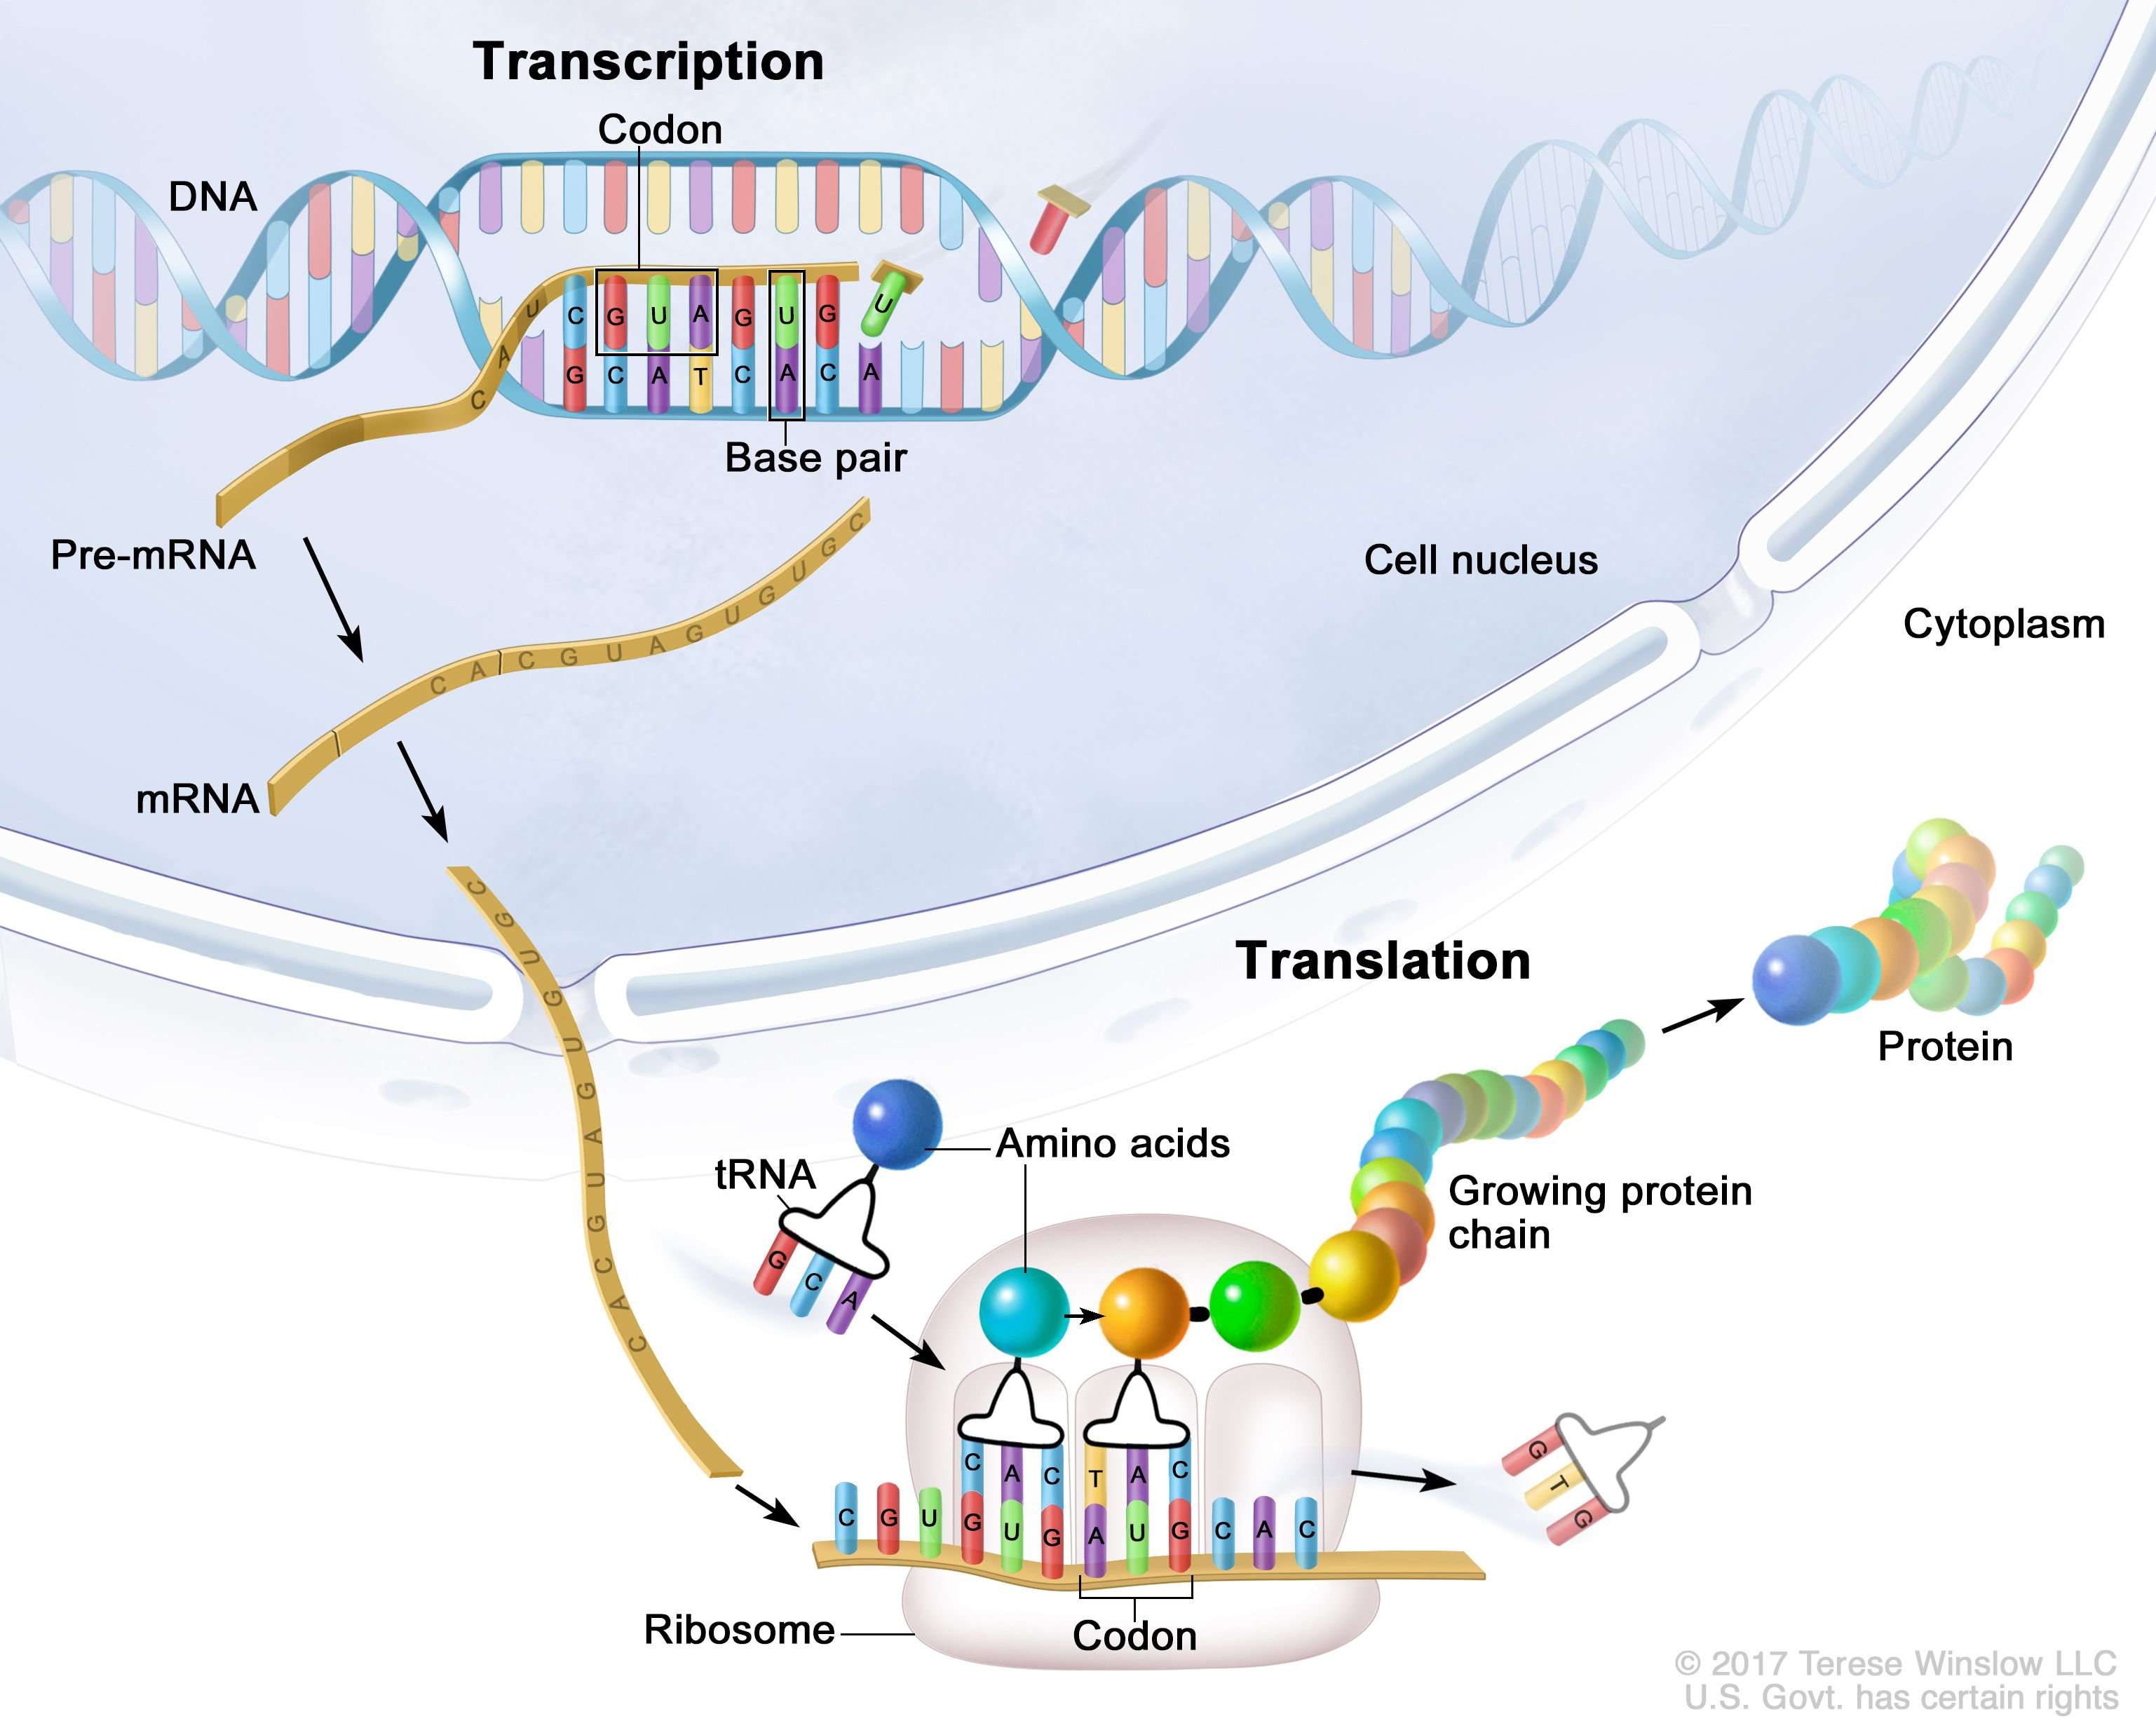

Cancer is characterized by an accumulation of mutations in DNA, causing changes in the function of proteins and therefore in the behavior of cells, making them:
- Self-sufficient in growth signals;
- Insensitive to growth inhibiting signals;
- Capable of avoiding apoptosis (cell immortality);
- Capable of replicating indefinitely (infinite growth)
- Capable of inducing angiogenesis and forming metastases.


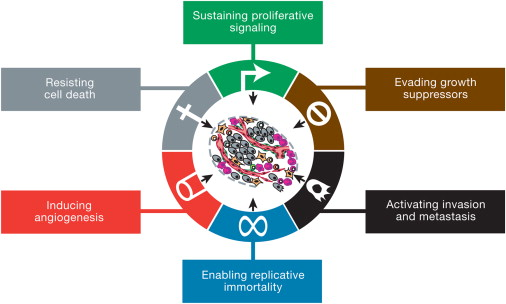

### Molecular characterization 

The tumoral characterization can thus be improved with the analysis of its molecular characteristics. Molecular analysis refine the classification of the tumor. Indeed, the development of therapies specifically targeting certain tumor molecular alterations present only in subgroups of patients, currently allows an increasingly important personalization of cancer treatment. The detection of these molecular abnormalities relies on the quantification of specific proteins in tumor tissue (Immunohistochemistry), the fluorescence quantification of specific genetic elements in tumor cells (FISH), the identification of tumor genomic abnormalities by sequencing of the DNA (NGS). Taking these characteristics into account when choosing the therapeutic approach has shown strong impacts on reducing the risk of disease progression (eg 35% for the treatment of metastatic breast cancer with Alpelisib, a molecule prescribed for female patients presenting RH + cancers (immunohistochemical characterization) with the presence of activating genomic mutations of the PIK3CA gene (NGS characterization)).

**It is the tumor precise characterization that makes it possible to better understand the biology of a given patient's cancer and thus to prescribe the most suitable treatment.**

However, **the complexity and number of examinations to perform for the precise characterization of the tumor increases the risk of errors.** For example, the proposal for innovative targeted chemotherapies is based on the combined interpretation by the physician of (i) morphological examination, HE biopsy, (ii) of the Extended Evaluation, (iii) of immunohistochemistry, (iv) of genomic analysis by DNA sequencing. The use of more and more parameters tends to make the diagnosis impracticable by the physician alone.

## Conclusion: (Data Camp Objective)

The complexity of tumor diagnosis requires the development of new solutions allowing the automatic integration of multiparametric morphological and molecular analyzes allowing physician support in their diagnostic process, thus improving their analytical capacities and their ability to offer effective personalized treatments.

**The development of statistical learning algorithms and Data Science has opened up opportunities for improvement in this field, but are still very limited. Indeed, these developments require access to data that are difficult to obtain, are based on complex interdisciplinary know-how (mathematics, medicine and Computer Science). In this challenge, your mission will be to predict with the best possible precision the survival of each patient according to their clinical, morphometric and molecular characteristics.**

Side Quest : Given the importance of anatomopathological diagnosis in the clinical management of patients, we have chosen to offer you an additional mission: the prediction of the histological type according to the clinical and molecular data of the tumor. This prediction could be used in particular as a basis to complete the analysis of the biopsy by the doctors in the event of an ambiguity on the classification of the tumor.


# Getting started
The starting kit notebook can be found [here](https://github.com/MathieuJuttet/Cancer/blob/main/Starting_kit.ipynb). It provides detailed information on the project and explanations on the data.

## Data Loading and Processing

Collecting large and complete data for tumor characterization is a complex task. We have chosen to base ourselves on the GDC Portal, which aggregates many databases specializing in cancer. The GDC Data Portal is a robust data-driven platform that allows cancer researchers and bioinformaticians to search and download cancer data for analysis.

The GDC Data Portal combines 67 projects focusing on 68 different cancers for a total of 84,392 patients. We were interested in patients with primary breast cancer (9,115 cases). Data retrieval for these 9115 patients was achieved by sending a JSON through the GDC API.


In order to get data, we used the API provided by the GDC website. From this load, we got 4 datasets that we loaded in separate dataframes. First, we will show how we performed the API query, then how we have cleaned them up to get a single dataframe. 


In [3]:
import requests
import json
import pandas as pd
import numpy as np
import os.path
from scipy import stats 
import matplotlib.pyplot as plt

In [4]:
##### Folders
pload_p = "payload/"
data_p = "data/"

headers = {'Content-Type': 'application/json',}
root = 'https://api.gdc.cancer.gov/'
endpt_l = {
    "case": "cases",
    "ssm": "ssm_occurrences",
    "cnv": "cnv_occurrences",
    "gene": "analysis/top_mutated_genes_by_project",
    "survival": "analysis/survival"}

pload_l = ["case", "ssm", "cnv", "gene"]

def dl(endpt, data):
    """ simple wrapper around request.post with correct arguments filled in.
    """
    
    # survival is a particular case
    if endpt == "analysis/survival":
        response = requests.get(r"https://api.gdc.cancer.gov/analysis/survival?filters={%22op%22%3A%22%3D%22%2C%22content%22%3A{%22field%22%3A%22primary_site%22%2C%22value%22%3A%22breast%22}}&pretty=true")
    else:
        response = requests.post(root + endpt, timeout=30, headers=headers, data=data)

    return response.text

In [5]:
def fill_filter_gene():
    """ Builds the filter for cvn/ssm to ensure only motation on top genes are reported.
    """
    top_genes = pd.read_csv(data_p + "gene.tsv", "\t")["symbol"].to_numpy()
    for req in ("ssm", "cnv"):
        with open(pload_p + req, "r+") as f:
            payload = json.load(f)
            payload["filters"]["content"][0]["content"]["value"] = list(top_genes)
            f.seek(0)
            json.dump(payload, f, separators=(",",":"))
            f.truncate()

In [6]:
def load(fname, force_dl=False):
    """ wrapper utility to avoid re-downloading data.
    """
    fp = data_p + fname + ".tsv"
    if not force_dl and os.path.exists(fp):
        return pd.read_csv(fp, sep="\t", low_memory=False)
    #load request params
    print(f"file {fp} not found... Downloading...")
    data = open(pload_p + fname)
    text = dl(endpt_l[fname], data)
    
    #special case reformatting for the survival data that is not tsv.
    if fname == "survival":
        d = pd.DataFrame(json.loads(text)["results"][0]["donors"])
        d.set_index("id")
        text = d.to_csv(sep="\t")
        
    with open(fp, "w") as f:
        f.write(text)
    

    return pd.read_csv(fp, sep="\t", low_memory=False)

In [7]:
df_case = load("case")
df_gene = load("gene")
fill_filter_gene() #update filters to only cater top 50genes
df_ssm = load("ssm")
df_cnv = load("cnv")

### Clinical and pathological Data

The clinical and pathological data is provided through the df_case dataframe. It contains general informations about the patient, age, sexe, ethnicity, multiple risk factors, diagnosis informations, what treatment has been given, the stage of the tumor, caracteristics of the tumor...etc

Below is the display of all the columns and their filling purcentage.


In [8]:
serie = df_case.notnull().mean() * 100
for name,val in zip(serie.index,serie): 
    print(name,'\t',val)

annotations.0.annotation_id 	 0.31815688425671973
annotations.0.case_id 	 0.31815688425671973
annotations.0.category 	 0.31815688425671973
annotations.0.classification 	 0.31815688425671973
annotations.0.created_datetime 	 0.31815688425671973
annotations.0.entity_id 	 0.31815688425671973
annotations.0.entity_submitter_id 	 0.31815688425671973
annotations.0.entity_type 	 0.31815688425671973
annotations.0.notes 	 0.31815688425671973
annotations.0.state 	 0.31815688425671973
annotations.0.status 	 0.31815688425671973
annotations.0.submitter_id 	 0.31815688425671973
annotations.0.updated_datetime 	 0.31815688425671973
annotations.1.annotation_id 	 0.06582556226001096
annotations.1.case_id 	 0.06582556226001096
annotations.1.category 	 0.06582556226001096
annotations.1.classification 	 0.06582556226001096
annotations.1.created_datetime 	 0.06582556226001096
annotations.1.entity_id 	 0.06582556226001096
annotations.1.entity_submitter_id 	 0.06582556226001096
annotations.1.entity_type 	 0.065

samples.0.time_between_excision_and_freezing 	 0.0
samples.0.tissue_collection_type 	 0.0
samples.0.tissue_type 	 100.0
samples.0.tumor_code 	 0.0
samples.0.tumor_code_id 	 0.0
samples.0.tumor_descriptor 	 28.337904552934724
samples.0.updated_datetime 	 100.0
samples.1.biospecimen_anatomic_site 	 2.227098189797038
samples.1.biospecimen_laterality 	 0.0
samples.1.catalog_reference 	 0.0
samples.1.composition 	 0.7679648930334613
samples.1.created_datetime 	 7.383433900164564
samples.1.current_weight 	 0.0
samples.1.days_to_collection 	 8.381788261108063
samples.1.days_to_sample_procurement 	 3.6642896324739436
samples.1.diagnosis_pathologically_confirmed 	 0.0
samples.1.distance_normal_to_tumor 	 0.0
samples.1.distributor_reference 	 0.0
samples.1.freezing_method 	 0.0
samples.1.growth_rate 	 0.0
samples.1.initial_weight 	 5.013713658804169
samples.1.intermediate_dimension 	 0.0
samples.1.is_ffpe 	 14.28414701042238
samples.1.longest_dimension 	 0.0
samples.1.method_of_sample_procuremen

We observe two things: 
* There are 782 columns and a lot of them a not useful to tackle our problem
* There are many empty columns

Over those 782 columns, we have decided to eliminate many of them. 
First, many are empty or almost empty, thus, we set a threshold corresponding to 10% of fill rate. Below this threshold we drop the column.
Moreover, some columns will persist but with no useful informations, such as the id's. Indeed, we are interested in having information about a certain patient, in one dataframe. Then, having the case_id, which is the id of the patient is enough to link all the dataframes together. Other columns are of no use for preduction such as the ones containing data on the tissue source site ( the hospital it has been taken from the patient), the sample state (which is to say if the data has been released of not)...etc. We also drop them.

In [9]:
df_case = df_case.drop(df_case.columns[df_case.notnull().mean()<0.1], axis=1)
columns_to_drop = ['tissue_source_site.code', 'tissue_source_site.project','tissue_source_site.name', 'diagnoses.0.treatments.1.state', 'diagnoses.0.state', 'diagnoses.0.treatments.0.state', 'exposures.0.state', 'samples.0.state', 'samples.1.state', 'samples.2.state', 'demographic.demographic_id', 'demographic.state', 'demographic.submitter_id', 'demographic.updated_datetime', 'diagnoses.0.diagnosis_id', 'diagnoses.0.icd_10_code', 'diagnoses.0.submitter_id', 'diagnoses.0.treatments.1.updated_datetime', 'diagnoses.0.treatments.1.submitter_id', 'diagnoses.0.treatments.0.updated_datetime', 'diagnoses.0.updated_datetime', 'exposures.0.exposure_id', 'exposures.0.submitter_id', 'exposures.0.updated_datetime', 'samples.0.created_datetime', 'samples.0.sample_id', 'samples.0.sample_type_id', 'samples.0.submitter_id', 'samples.0.updated_datetime', 'samples.1.sample_id', 'samples.1.sample_type_id', 'samples.1.submitter_id', 'samples.2.sample_id', 'samples.2.sample_type_id', 'samples.2.submitter_id', 'tissue_source_site.bcr_id', 'submitter_id', 'diagnoses.0.treatments.0.submitter_id', 'diagnoses.0.treatments.1.treatment_id', 'samples.2.updated_datetime', 'samples.1.updated_datetime', 'diagnoses.0.treatments.0.treatment_id', 'demographic.created_datetime', 'diagnoses.0.created_datetime', 'tissue_source_site.tissue_source_site_id']
df_case = df_case.drop(columns_to_drop, axis=1)
serie = df_case.notnull().mean()

### Molecular Biology Data

As we saw in the introduction, thanks to the post-genomic era (Lander, E. et al. Initial sequencing and analysis of the human genome. Nature (2001)), we are able to sequence DNA and integrate numerous biological data that allows us to develop increasingly personalized approaches to understanding and treating cancer. In this challenge, in combination with "traditional" criteria for characterizing cancer (ie: clinical and pathological data), we will also be interested in genetic data.

For each patient, we will focus on the 50 most mutated genes in this population. The choice of 50 genes out of 20 000 is arbitrary, but since we know that genetic alteration is the basis of cancer genesis, it makes sens to keep only the top mutated genes to get relevant information and to decrease the dimension of the dataframe.

in this challenge, we separated two types of molecular Data : the ones that comes from NGS, that is genomic alterations (genomique data), and transcritpomic data, that is RNAseq quantification (quantity of RNA detected in the cytoplasm before the translation into protein).



#### Genomic data:

We will be interested in genetic mutations for the 50 most mutated genes in the population of patients with breast cancer.

There are two main types of mutations:

**Copy Number Variation" (CNV) type mutations and "Single somatic Mutation" (SSM) type mutations.**

- CNVs are a variation in the copy number of a given gene. Indeed, a gene is a sequence of several thousands of nucleotides. A CNV gain causes an increase in the number of copies of this gene, thus making the cell able to produce more RNA transcripts and therefore potentially more proteins leading to a modification of the biology of the cell. A CNV loss will lead to a disappearance of the gene leading to a loss of the protein and therefore of its biological functionality.

- SSMs are so-called ponctual mutations. The ponctual mutation will change one or a few nucleotides in the DNA sequence. This will change the copied RNA and the RNA-copying ribosome will not make the correct amino acid match. Thus, the protein will be modified and therefore its functionality as well.



In [10]:
columns_to_drop = ['cnv.cnv_id', 'id']
df_cnv.drop(columns_to_drop, axis=1, inplace=True)
df_cnv.notnull().mean()

case.case_id                        1.0
cnv.chromosome                      1.0
cnv.cnv_change                      1.0
cnv.consequence.0.consequence_id    1.0
cnv.consequence.0.gene.symbol       1.0
cnv.end_position                    1.0
cnv.gene_level_cn                   1.0
cnv.ncbi_build                      1.0
cnv.start_position                  1.0
cnv.variant_status                  1.0
dtype: float64

In [11]:
df_cnv.head()

,case.case_id,cnv.chromosome,cnv.cnv_change,cnv.consequence.0.consequence_id,cnv.consequence.0.gene.symbol,cnv.end_position,cnv.gene_level_cn,cnv.ncbi_build,cnv.start_position,cnv.variant_status
0,c5891c7a-fd24-4891-8f51-373967e4a6dd,17,Loss,99c68f83-9514-5628-9623-0ba6095dd90f,BCAS3,61392838,True,GRCh38,60677453,Tumor only
1,d5f2b85a-94a9-4168-bbe8-149ec71342b0,17,Gain,a7e6f054-f5a1-5e7f-a0c0-8daa7373a434,ABCA8,68955392,True,GRCh38,68867292,Tumor only
2,eafa45a4-2fd1-4fa3-860c-9d52ed382b7d,11,Gain,924c27ca-11cf-5b13-95b9-cf518abb142d,ORAOV1,69675416,True,GRCh38,69653076,Tumor only
3,dd0f8e5a-383d-4f03-bb71-0e115d4e442c,11,Gain,00461981-a326-573d-a9a1-ad82872a1aea,SHANK2,71252577,True,GRCh38,70467856,Tumor only
4,233b02f3-c4f0-4a67-9db5-e68d5cdaccb6,8,Gain,c6208422-2c76-553a-b0eb-4472e816381f,MYC,127741434,True,GRCh38,127735434,Tumor only


Now let's look at the SSM dataframe

In [12]:
serie = df_ssm.notnull().mean()*100
for name,val in zip(serie.index,serie): 
    print(name,'\t',val)

case.case_id 	 100.0
id 	 100.0
ssm.chromosome 	 100.0
ssm.consequence.0.consequence_id 	 100.0
ssm.consequence.0.transcript.gene.symbol 	 100.0
ssm.consequence.1.consequence_id 	 91.22283766510438
ssm.consequence.1.transcript.gene.symbol 	 91.22283766510438
ssm.consequence.10.consequence_id 	 30.336599914784834
ssm.consequence.10.transcript.gene.symbol 	 30.336599914784834
ssm.consequence.11.consequence_id 	 29.825308904985086
ssm.consequence.11.transcript.gene.symbol 	 29.825308904985086
ssm.consequence.12.consequence_id 	 26.8001704303366
ssm.consequence.12.transcript.gene.symbol 	 26.8001704303366
ssm.consequence.13.consequence_id 	 26.54452492543673
ssm.consequence.13.transcript.gene.symbol 	 26.54452492543673
ssm.consequence.14.consequence_id 	 26.501917341286752
ssm.consequence.14.transcript.gene.symbol 	 26.501917341286752
ssm.consequence.15.consequence_id 	 26.41670217298679
ssm.consequence.15.transcript.gene.symbol 	 26.41670217298679
ssm.consequence.16.consequence_id 	 26.37

The consequence_id, as well as the cosmic_id are not useful at all. We delete them all.

In [13]:
df_ssm.drop(df_ssm.columns[df_ssm.columns.str.contains('ce_id')], axis=1, inplace=True)
df_ssm.drop(df_ssm.columns[df_ssm.columns.str.contains('[0-2][1-9]')], axis=1, inplace=True)
df_ssm.drop(df_ssm.columns[df_ssm.columns.str.contains('[1-9]')], axis=1, inplace=True)
columns_to_drop = ["ssm.cosmid_id.0","id"]
df_ssm.drop("id", axis=1,inplace=True)
df_ssm.head(5)

,case.case_id,ssm.chromosome,ssm.consequence.0.transcript.gene.symbol,ssm.cosmic_id.0,ssm.end_position,ssm.genomic_dna_change,ssm.mutation_subtype,ssm.mutation_type,ssm.ncbi_build,ssm.reference_allele,ssm.ssm_id,ssm.start_position,ssm.tumor_allele
0,d2694b09-7844-4496-865c-5d3d8cd03330,chr3,MUC4,NaN,195780168,chr3:g.195780168A>T,Single base substitution,Simple Somatic Mutation,GRCh38,A,92dded19-d0ce-5c34-9d99-169342f9bc37,195780168,T
1,17baef7c-d97d-4b98-ab53-503ef856523d,chr3,PIK3CA,COSM446001,179203764,chr3:g.179203764A>C,Single base substitution,Simple Somatic Mutation,GRCh38,A,7ea2ecba-9bbc-5d84-8a58-2ed20f13bdf3,179203764,C
2,d3d545b3-457f-4389-821f-704cb24aff7f,chr17,TP53,COSM1480087,7676042,chr17:g.7676041_7676042insGA,Small insertion,Simple Somatic Mutation,GRCh38,'-,1c4dad33-40cc-58d0-9d8c-4d808cb33401,7676041,GA
3,55262fcb-1b01-4480-b322-36570430c917,chr17,ABCA8,NaN,68883820,chr17:g.68883820C>G,Single base substitution,Simple Somatic Mutation,GRCh38,C,905a9d14-3a2e-5fb8-994e-48a2e5a1fa54,68883820,G
4,91b09291-5944-4691-a0d8-7d1ccc649b9b,chr3,MUC4,COSM3847118,195782578,chr3:g.195782578G>A,Single base substitution,Simple Somatic Mutation,GRCh38,G,eb5acb6d-ebcc-50fc-9dc0-9a7ac5b85fc4,195782578,A


### 50 most mutated genes

Let us look at the 50 most mutated genes:

In [14]:
df_gene.head()

,_score,symbol
0,451.0,PIK3CA
1,404.0,TP53
2,322.0,MUC4
3,320.0,SHANK2
4,318.0,ANO1


These genes are well known for being involved in cancer genesis. For instance, TP53 is the gene that produces the p53 protein, which is considered by biologists as the most important anticancer protein. It can activate DNA repair proteins when DNA has sustained damage. It can also initiate apoptosis (i.e, programmed cell death) if DNA damage proves to be irreparable, therefore preventing an accumulation of mutations leading to a potential cancer. It's alteration is therefore seen in most cancers.


### Transcriptomic Data (RNA)

It is extremely relevant to add the so-called “transcriptomic” data to these genomic data. It corresponds to the level of the genes expression. The transcriptom represents the amount of mRNA produced by the transcription of each gene's DNA by the RNA polymeraze. It is therefore interesting to look at this level of gene expression because it provides more direct information on the number of proteins and their types than analysis of DNA alone.

We need 3 data tables to be able to use the transcriptomic data:

* HTseq data (in ENSEMBL, transcriptome_case_id format) $\rightarrow$ main transcriptomic data

* ENSEMBL to symbol table

* transcriptome_case_id to case_id table

#### ENSEMBL to Symbol

To get the relation table, click [this link](https://www.genenames.org/cgi-bin/download/custom?col=gd_app_sym&col=md_ensembl_id&status=Approved&status=Entry%20Withdrawn&hgnc_dbtag=on&order_by=gd_app_sym_sort&format=text&submit=submit) from [https://www.genenames.org/cgi-bin/download](https://www.genenames.org/cgi-bin/download). Symbols and ENSEMBL are two conventions in naming genes and CNV, SSM data use symbols while Transcriptomic data use ENSEMBL.

Create a folder ```transcriptome``` in ```./data```, put the coresponding file in it. Rename it ```ENSEMBL.txt``` then run the following code:

In [15]:
ensembl = pd.read_csv('./data/transcriptome/ENSEMBL.txt', sep="\t", header=0)
ensembl.head(5)

,Approved symbol,Ensembl ID(supplied by Ensembl)
0,A1BG,ENSG00000121410
1,A1BG-AS1,ENSG00000268895
2,A1CF,ENSG00000148584
3,A1S9T,NaN
4,A2M,ENSG00000175899


We only keep the 50 more mutated genes:

In [16]:
df_gene = pd.read_csv('data/gene.tsv', sep='\t')
df_gene_exp = (pd.merge(df_gene, ensembl, 
                       how='inner', 
                       left_on='symbol', 
                       right_on='Approved symbol')
               .drop(["Approved symbol", "_score"], axis=1)
               .rename(columns={"Ensembl ID(supplied by Ensembl)": "Ensembl ID"})
              )
df_gene_exp.head(5)

,symbol,Ensembl ID
0,PIK3CA,ENSG00000121879
1,TP53,ENSG00000141510
2,MUC4,ENSG00000145113
3,SHANK2,ENSG00000162105
4,ANO1,ENSG00000131620


We rather use a dictionnary to access rapidly the corresponding Symbol of an ENSEMBL ID:

In [17]:
match_gene = {}
for symb, ens in zip(df_gene_exp["symbol"], df_gene_exp["Ensembl ID"]):
    match_gene[ens] = symb

#### UUID matching

The UUID in the transcriptomic data corresponds to different values than the one used for the general medical data. Fortunately, we can find a correspondance in a json file downloadable from [the gdc portal website](https://portal.gdc.cancer.gov/repository?filters=%7B%22op%22%3A%22and%22%2C%22content%22%3A%5B%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.analysis.workflow_type%22%2C%22value%22%3A%5B%22HTSeq%20-%20Counts%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.cases.primary_site%22%2C%22value%22%3A%5B%22breast%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.data_type%22%2C%22value%22%3A%5B%22Gene%20Expression%20Quantification%22%5D%7D%7D%5D%7D) (click on the JSON button under the pie charts).

Put the file in ```./data/transcriptome``` and name it ```UUID_match.json```.

In [16]:
with open("./data/transcriptome/UUID_match.json", "r") as f:
    json_content = json.load(f)

match_uuid = {}
for dico in json_content:
    match_uuid[dico['file_name']] = dico['cases'][0]['case_id']

#### Download transcriptomic data

The first step consists in downloading the manifest file by clicking on the download button named **Manifest** in [this page](https://portal.gdc.cancer.gov/repository?filters=%7B%22op%22%3A%22and%22%2C%22content%22%3A%5B%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.analysis.workflow_type%22%2C%22value%22%3A%5B%22HTSeq%20-%20Counts%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.cases.primary_site%22%2C%22value%22%3A%5B%22breast%22%5D%7D%7D%2C%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22files.data_type%22%2C%22value%22%3A%5B%22Gene%20Expression%20Quantification%22%5D%7D%7D%5D%7D) of the gdc portal website. The manifest contains all the information about what is wanted to be downloaded from the database (that is to say the transcriptomic data).

The second steps is to install [gdc client](https://gdc.cancer.gov/access-data/gdc-data-transfer-tool#:~:text=The%20GDC%20provides%20a%20standard%20client-based%20mechanism%20in,or%20FASTQ%2C%20make%20up%20the%20bulk%20of%20data.) to download the data. 

**Important**: set "gdc-client" to the environnement path variables by pointing to the ```gdc-client.exe``` file.

Then open a terminal and go to ```./data/transcriptome``` where is also the manifest, then run:

```
gdc-client download -m <name of manifest>.txt
```

It will created thousands of folders, and each one contains a ```.gz``` zip file containing the transcriptomic data of 1 individual.

#### Extract content

In [17]:
# add useful info of 1 individual to dict 'merge'
# it directly uses 'match_uuid' and 'match_gene' done previously
# to already store the useful data
def add_case_htseq(content, merge, filename):
    for line in content:
        line = str(line)[2:-1]
        for ens in match_gene.keys():
            if ens in line:
                htseq = line.split('\\t')[1][:-2]
                merge["case_id"].append(match_uuid[filename])  # add UUID 
                merge["gene"].append(match_gene[line.split('.')[0]])  # add gene symbol
                merge["HTseq_counts"].append(int(htseq))   # add transcriptomic data
    return merge

In [18]:
# long to run
import gzip
import os

merge_dict = {"case_id": list(), "gene": list(), "HTseq_counts": list()}
# Go through all the folders
for root, dirs, files in os.walk("./data/transcriptome", topdown=False):
    for name in files:
        if name.endswith(".gz"):   # if .gz file containing the wanted data 
            with gzip.open(os.path.join(root, name), 'r') as f:
                content = f.readlines()   # list of the lines (costly step)
                # add useful data into merge:
                merge_dict = add_case_htseq(content, merge_dict, name)   

In [19]:
df_arn = pd.DataFrame(merge_dict)
df_arn.to_csv("./data/arn.tsv")   # save the dataframe (long to run)

After executing the above code, you have four .tsv files in a data folder.
Now, we will load the downloaded data cleaning we have done.

In [18]:
df_arn = pd.read_csv('data/arn.tsv',low_memory=False)

### Survival time

In order to use the survival data, one must download the TSV file of the survival plot from [this link](https://portal.gdc.cancer.gov/exploration?filters=%7B%22op%22%3A%22and%22%2C%22content%22%3A%5B%7B%22op%22%3A%22in%22%2C%22content%22%3A%7B%22field%22%3A%22cases.primary_site%22%2C%22value%22%3A%5B%22breast%22%5D%7D%7D%5D%7D&searchTableTab=genes) and put it in ```./data```.

In order to predict if a person will survive, we use the "time" and "survivalEstimate" columns from those data. We must also have the "id" information to be able to join these data with the other ones.

In [19]:
df_survival = pd.read_csv('./data/survival-plot1.tsv', sep="\t")
df_survival = df_survival[["id", "survivalEstimate", "time"]]
df_survival.head(5)

,id,survivalEstimate,time
0,ce887e90-0660-4f44-a3a4-b3b894cb7eda,1.000000,0.002738
1,2b36853f-34d3-47c5-ba6a-e5a93233d2b1,1.000000,0.002738
2,ee554215-bea2-4268-aaf9-784e68cdb969,1.000000,0.002738
3,fe2cd610-aa52-4789-ac62-7683281bb22f,0.999071,0.013689
4,a855c228-a263-44df-87a0-cbc32187e3f5,0.999071,0.013689


## Merge of the dataframes

Now that we have all the dataframes required (df_case, df_cnv, df_ssm, df_arn, df_survival), we can join them into one.

### SSM

To avoid all the details of mutations, we need to aggregate the SSM data for any couple (case_id, gene). To do so, we decided to use a scoring of the types of mutations in terms of their expected consequences.

* **Single base substitution**: This type of mutation corresponds to the substituation of a ATGC base by an other. It can either just change the amino acid in the protein with variable changes, create or delete a stop codon that changes the size of the protein (rare), or change nothing. We attribute a score of $1$ for every such mutation.

* **Single base deletion/addition**: This type of mutation has a huge impact on the amino acid encoding since, what is called a frame-shift, can change all the amino acids after the mutation in the sequence. We attribute a score of $3$ for every such mutation.

In [20]:
def score_attribution(x):
    if x == "Single base substitution":
        return 1
    else:
        return 3

df_ssm["ssm.mutation_subtype"] = df_ssm["ssm.mutation_subtype"].apply(score_attribution)

We then sum the scores of each mutation for a given (case_id, gene):

In [21]:
df_ssm_ = (df_ssm[["case.case_id",
                  "ssm.consequence.0.transcript.gene.symbol",
                  "ssm.mutation_subtype"]]
          .groupby(by=["case.case_id", "ssm.consequence.0.transcript.gene.symbol"])
           .sum())
df_ssm_.reset_index(inplace=True)  
df_ssm_.head(5)

,case.case_id,ssm.consequence.0.transcript.gene.symbol,ssm.mutation_subtype
0,00807dae-9f4a-4fd1-aac2-82eb11bf2afb,MUC4,2
1,00807dae-9f4a-4fd1-aac2-82eb11bf2afb,PIK3CA,1
2,00807dae-9f4a-4fd1-aac2-82eb11bf2afb,RYR2,1
3,00807dae-9f4a-4fd1-aac2-82eb11bf2afb,TG,1
4,00807dae-9f4a-4fd1-aac2-82eb11bf2afb,TP53,1


We rename the columns to make things simpler:

In [22]:
df_ssm_ = df_ssm_.rename(columns={"ssm.mutation_subtype": "ssm.mutation_importance",
                       "ssm.consequence.0.transcript.gene.symbol": "ssm.symbol"})
df_ssm_.head(5)

,case.case_id,ssm.symbol,ssm.mutation_importance
0,00807dae-9f4a-4fd1-aac2-82eb11bf2afb,MUC4,2
1,00807dae-9f4a-4fd1-aac2-82eb11bf2afb,PIK3CA,1
2,00807dae-9f4a-4fd1-aac2-82eb11bf2afb,RYR2,1
3,00807dae-9f4a-4fd1-aac2-82eb11bf2afb,TG,1
4,00807dae-9f4a-4fd1-aac2-82eb11bf2afb,TP53,1


We use pivoting to obtain a one hot encoding of every gene for a given patient:

In [23]:
df_ssm_pivot = df_ssm_.pivot(index="case.case_id",
                             columns="ssm.symbol",
                             values=["ssm.mutation_importance"])
df_ssm_pivot.reset_index(inplace=True)
df_ssm_pivot.fillna(0., inplace=True)  # We put 0 since there is no mutation
df_ssm_pivot.head(5)

case.case_id ssm.mutation_importance  \
ssm.symbol                                                        ABCA10   
0           00807dae-9f4a-4fd1-aac2-82eb11bf2afb                     0.0   
1           00a2d166-78c9-4687-a195-3d6315c27574                     0.0   
2           00b11ca8-8540-4a3d-b602-ec754b00230b                     0.0   
3           011b9b2d-ebe5-42bf-9662-d922faccc7a1                     0.0   
4           01263518-5f7c-49dc-8d7e-84b0c03a6a63                     0.0   

                                                        ...                   \
ssm.symbol ABCA6 ABCA8 ABCA9 AMZ2 ANO1 ARSG BCAS3 BPTF  ... RYR2 SDK2 SHANK2   
0            0.0   0.0   0.0  0.0  0.0  0.0   0.0  0.0  ...  1.0  0.0    0.0   
1            0.0   0.0   0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0  0.0    0.0   
2            0.0   0.0   0.0  0.0  0.0  0.0   0.0  1.0  ...  0.0  0.0    0.0   
3            0.0   1.0   0.0  0.0  0.0  0.0   0.0  0.0  ...  0.0  1.0    0.0   
4            1.0   0.0   0.0  0.0  0.0  0.0   0.0  1.0  ...  0.0  0.0    0.0   

                                                     
ssm.symbol SLC16A6 TANC2   TG TP53 TPCN2 TRPS1  TTN  
0              0.0   0.0  1.0  1.0   0.0   0.0  0.0  
1              0.0   0.0  0.0  0.0   0.0   0.0  0.0  
2              0.0   0.0  0.0  0.0   0.0   0.0  0.0  
3              0.0   0.0  0.0  0.0   0.0   0.0  0.0  
4              0.0   0.0  0.0  1.0   0.0   0.0  0.0  

[5 rows x 47 columns]

In [24]:
# Flatten the multi-indexing
df_ssm_pivot.columns = df_ssm_pivot.columns.droplevel()

In [25]:
# rename every column
renames = {}
for x in df_ssm_pivot.columns:
#     print("*", x)
    if x == '':
        renames[x] = 'case.case_id'
    else:
        renames[x] = 'ssm.importance.' + x 

In [26]:
df_ssm_pivot = df_ssm_pivot.rename(columns=renames)
df_ssm_pivot.head(5)

ssm.symbol,case.case_id,ssm.importance.ABCA10,ssm.importance.ABCA6,ssm.importance.ABCA8,ssm.importance.ABCA9,ssm.importance.AMZ2,ssm.importance.ANO1,ssm.importance.ARSG,ssm.importance.BCAS3,ssm.importance.BPTF,...,ssm.importance.RYR2,ssm.importance.SDK2,ssm.importance.SHANK2,ssm.importance.SLC16A6,ssm.importance.TANC2,ssm.importance.TG,ssm.importance.TP53,ssm.importance.TPCN2,ssm.importance.TRPS1,ssm.importance.TTN
0,00807dae-9f4a-4fd1-aac2-82eb11bf2afb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,00a2d166-78c9-4687-a195-3d6315c27574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00b11ca8-8540-4a3d-b602-ec754b00230b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,011b9b2d-ebe5-42bf-9662-d922faccc7a1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01263518-5f7c-49dc-8d7e-84b0c03a6a63,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### CNV

We do the the same king of aggregation with CNV except we normally have only one cnv max per gene. We still aggregate with a 'min' to manage only one if there turns out to be 2 CNVs.

In [27]:
df_cnv_ = (df_cnv[["case.case_id", "cnv.cnv_change", "cnv.consequence.0.gene.symbol"]]
           .groupby(["case.case_id", "cnv.consequence.0.gene.symbol"])
           .aggregate('min')
          )
df_cnv_.reset_index(inplace=True)
df_cnv_ = df_cnv_.rename(columns={'cnv.consequence.0.gene.symbol':
                                 'cnv.symbol'})
df_cnv_.head(5)

,case.case_id,cnv.symbol,cnv.cnv_change
0,001cef41-ff86-4d3f-a140-a647ac4b10a1,ANO1,Gain
1,001cef41-ff86-4d3f-a140-a647ac4b10a1,AP001888.1,Gain
2,001cef41-ff86-4d3f-a140-a647ac4b10a1,CCND1,Gain
3,001cef41-ff86-4d3f-a140-a647ac4b10a1,CPT1A,Gain
4,001cef41-ff86-4d3f-a140-a647ac4b10a1,CTTN,Gain


Pivoting:

In [28]:
df_cnv_pivot = df_cnv_.pivot(index="case.case_id",
                             columns="cnv.symbol",
                             values=["cnv.cnv_change"])
df_cnv_pivot.reset_index(inplace=True)
df_cnv_pivot.fillna('None', inplace=True)
df_cnv_pivot.columns = df_cnv_pivot.columns.droplevel()

Renaming:

In [29]:
renames = {}
for x in df_cnv_pivot.columns:
#     print("*", x)
    if x == '':
        renames[x] = 'case.case_id'
    else:
        renames[x] = 'cnv.change.' + x 

In [30]:
df_cnv_pivot = df_cnv_pivot.rename(columns=renames)
df_cnv_pivot.head(5)

cnv.symbol,case.case_id,cnv.change.ABCA10,cnv.change.ABCA6,cnv.change.ABCA8,cnv.change.ABCA9,cnv.change.AC108925.1,cnv.change.AMZ2,cnv.change.ANO1,cnv.change.AP001888.1,cnv.change.ARSG,...,cnv.change.RYR2,cnv.change.SDK2,cnv.change.SHANK2,cnv.change.SLC16A6,cnv.change.TANC2,cnv.change.TG,cnv.change.TP53,cnv.change.TPCN2,cnv.change.TRPS1,cnv.change.TTN
0,001cef41-ff86-4d3f-a140-a647ac4b10a1,None,None,None,None,None,None,Gain,Gain,None,...,None,None,Gain,None,None,None,None,Gain,None,None
1,00807dae-9f4a-4fd1-aac2-82eb11bf2afb,Gain,Gain,Gain,Gain,None,Gain,None,None,Gain,...,None,Gain,None,Gain,Gain,None,None,None,None,None
2,00a2d166-78c9-4687-a195-3d6315c27574,Gain,Gain,Gain,Gain,None,Gain,None,None,Gain,...,None,Gain,None,Gain,Gain,None,None,None,None,None
3,00b11ca8-8540-4a3d-b602-ec754b00230b,None,None,None,None,None,None,Gain,Gain,None,...,None,None,None,None,None,None,None,Gain,None,None
4,011b9b2d-ebe5-42bf-9662-d922faccc7a1,None,None,None,None,None,None,None,None,None,...,Gain,None,None,None,None,None,None,None,None,None


### RNA

We only need pivoting and renaming for ARN.

In [31]:
df_arn.head(5)

,Unnamed: 0,case_id,gene,HTseq_counts
0,0,59bf0ce4-715a-4017-bccb-c59916e78324,TG,183
1,1,59bf0ce4-715a-4017-bccb-c59916e78324,SDK2,98
2,2,59bf0ce4-715a-4017-bccb-c59916e78324,FGF4,0
3,3,59bf0ce4-715a-4017-bccb-c59916e78324,CTTN,11975
4,4,59bf0ce4-715a-4017-bccb-c59916e78324,TRPS1,14826


In [32]:
df_arn_pivot = df_arn.pivot_table(index="case_id",
                             columns="gene",
                             values="HTseq_counts",
                             aggfunc='sum'
                           )
df_arn_pivot.reset_index(inplace=True)

In [33]:
renames = {}
for x in df_arn_pivot.columns:
    if x in ['case_id']:
        renames[x] = x
    else:
        renames[x] = 'arn.HTseq_counts.' + x 

In [34]:
df_arn_pivot = df_arn_pivot.rename(columns=renames)
df_arn_pivot.head(5)

gene,case_id,arn.HTseq_counts.ABCA10,arn.HTseq_counts.ABCA6,arn.HTseq_counts.ABCA8,arn.HTseq_counts.ABCA9,arn.HTseq_counts.AMZ2,arn.HTseq_counts.ANO1,arn.HTseq_counts.ARSG,arn.HTseq_counts.BCAS3,arn.HTseq_counts.BPTF,...,arn.HTseq_counts.RYR2,arn.HTseq_counts.SDK2,arn.HTseq_counts.SHANK2,arn.HTseq_counts.SLC16A6,arn.HTseq_counts.TANC2,arn.HTseq_counts.TG,arn.HTseq_counts.TP53,arn.HTseq_counts.TPCN2,arn.HTseq_counts.TRPS1,arn.HTseq_counts.TTN
0,001cef41-ff86-4d3f-a140-a647ac4b10a1,46,160,197,85,5055,4188,2270,1645,5340,...,42,368,1628,2222,4110,18,3437,1057,27924,285
1,0045349c-69d9-4306-a403-c9c1fa836644,61,127,347,194,2248,7408,823,2302,9236,...,33,3836,8336,165,1714,133,11130,758,12095,1219
2,007df8da-3d8c-497d-b7d3-3a02596f9577,111,225,217,172,2644,1289,598,1210,2906,...,30,36,1146,2870,3592,16,389,401,20801,1074
3,00807dae-9f4a-4fd1-aac2-82eb11bf2afb,31,127,121,88,2932,1694,488,376,2349,...,83,74,1942,729,3846,18,2997,655,8320,341
4,00a2d166-78c9-4687-a195-3d6315c27574,21,143,26,68,13775,2622,1024,1966,9583,...,34,266,1274,700,9455,19,6779,1123,13940,306


### MERGE

We want to keep the individuals that have at least one info on their genetics. We use 'outer' joins first between genetic tables (SSM, CNV, ARN), then 'right' on the merge with Case, where Case is on the left.

In [35]:
# SSM + CNV
df = pd.merge(df_ssm_pivot, df_cnv_pivot, how='outer', left_on='case.case_id', right_on='case.case_id')
# (SSM + CNV) + ARN
df_arn_pivot.rename(columns={'case_id': 'case.case_id'}, inplace=True)
df = pd.merge(df, df_arn_pivot, how='outer', left_on='case.case_id', right_on='case.case_id')
# Case + ((SSM + CNV) + ARN)
df.rename(columns={'case.case_id': 'case_id'}, inplace=True)
df = pd.merge(df_case, df, how='right', left_on='case_id', right_on='case_id')
df.head(5)

,case_id,demographic.age_at_index,demographic.days_to_birth,demographic.ethnicity,demographic.gender,demographic.race,demographic.vital_status,demographic.year_of_birth,diagnoses.0.age_at_diagnosis,diagnoses.0.ajcc_pathologic_m,...,arn.HTseq_counts.RYR2,arn.HTseq_counts.SDK2,arn.HTseq_counts.SHANK2,arn.HTseq_counts.SLC16A6,arn.HTseq_counts.TANC2,arn.HTseq_counts.TG,arn.HTseq_counts.TP53,arn.HTseq_counts.TPCN2,arn.HTseq_counts.TRPS1,arn.HTseq_counts.TTN
0,00807dae-9f4a-4fd1-aac2-82eb11bf2afb,50.0,-18345.0,not hispanic or latino,female,white,Alive,1955.0,18345.0,M0,...,83.0,74.0,1942.0,729.0,3846.0,18.0,2997.0,655.0,8320.0,341.0
1,00a2d166-78c9-4687-a195-3d6315c27574,56.0,-20713.0,not hispanic or latino,female,white,Alive,1954.0,20713.0,M0,...,34.0,266.0,1274.0,700.0,9455.0,19.0,6779.0,1123.0,13940.0,306.0
2,00b11ca8-8540-4a3d-b602-ec754b00230b,61.0,-22497.0,not hispanic or latino,female,white,Alive,1951.0,22497.0,MX,...,177.0,528.0,2830.0,880.0,5889.0,56.0,4543.0,3168.0,15170.0,1334.0
3,011b9b2d-ebe5-42bf-9662-d922faccc7a1,71.0,-26274.0,not hispanic or latino,female,white,Alive,1939.0,26274.0,MX,...,418.0,603.0,6459.0,12415.0,17324.0,391.0,7822.0,1206.0,212884.0,19495.0
4,01263518-5f7c-49dc-8d7e-84b0c03a6a63,76.0,-27942.0,not reported,female,not reported,Alive,1933.0,27942.0,M1,...,29.0,37.0,4405.0,1289.0,15729.0,20.0,5374.0,2801.0,40581.0,244.0


One can check the columns and assess there is everything:

In [36]:
for col in df.columns:
    print(col)

case_id
demographic.age_at_index
demographic.days_to_birth
demographic.ethnicity
demographic.gender
demographic.race
demographic.vital_status
demographic.year_of_birth
diagnoses.0.age_at_diagnosis
diagnoses.0.ajcc_pathologic_m
diagnoses.0.ajcc_pathologic_n
diagnoses.0.ajcc_pathologic_stage
diagnoses.0.ajcc_pathologic_t
diagnoses.0.ajcc_staging_system_edition
diagnoses.0.classification_of_tumor
diagnoses.0.days_to_diagnosis
diagnoses.0.days_to_last_follow_up
diagnoses.0.last_known_disease_status
diagnoses.0.morphology
diagnoses.0.primary_diagnosis
diagnoses.0.prior_malignancy
diagnoses.0.prior_treatment
diagnoses.0.progression_or_recurrence
diagnoses.0.site_of_resection_or_biopsy
diagnoses.0.synchronous_malignancy
diagnoses.0.tissue_or_organ_of_origin
diagnoses.0.treatments.0.treatment_or_therapy
diagnoses.0.treatments.0.treatment_type
diagnoses.0.treatments.1.treatment_or_therapy
diagnoses.0.treatments.1.treatment_type
diagnoses.0.tumor_grade
diagnoses.0.tumor_stage
diagnoses.0.year_of

We may have forgotten some genes in the pivotings that were not involved in a particular dataset (CNV, SSM or ARN).

In [37]:
genes = list(df_gene["symbol"].sort_values().to_numpy())

CNV contains all the 50 genes:

In [38]:
genes_cnv = [col[11:] for col in df if col.startswith('cnv.change.')]
len(genes_cnv)

50

Missing genes in SSM:

In [39]:
genes_ssm = [col[15:] for col in df if col.startswith('ssm.importance.')]
ssm_missing = set(genes) - set(genes_ssm)
print(ssm_missing)

{'FGF19', 'AP001888.1', 'FADD', 'AC108925.1'}


Missing genes in ARN:

In [40]:
genes_arn = [col[17:] for col in df if col.startswith('arn.HTseq_counts.')]
arn_missing = set(genes) - set(genes_arn)
print(arn_missing)

{'ORAOV1', 'AP001888.1', 'AC108925.1'}


Add the missing columns:

In [41]:
for gene in ssm_missing:
    col = 'ssm.importance.' + gene
    df[col] = 0.

In [42]:
for gene in arn_missing:
    col = 'arn.HTseq_counts.' + gene
    df[col] = 0.

In [43]:
# adding up the survival rate
df = pd.merge(df, df_survival, left_on="case_id", right_on="id", how="left")
try:
    df.drop("Unnamed: 0", inplace=True, axis=1)
except:
    pass

In [ ]:
df.to_csv("./data/gdc_final_database.csv")

## Whole dataframe

In [44]:
df = pd.read_csv("./data/gdc_final_database.csv")
df.drop("Unnamed: 0", inplace=True, axis=1)

In [45]:
df.head(5)

,case_id,demographic.age_at_index,demographic.days_to_birth,demographic.ethnicity,demographic.gender,demographic.race,demographic.vital_status,demographic.year_of_birth,diagnoses.0.age_at_diagnosis,diagnoses.0.ajcc_pathologic_m,...,arn.HTseq_counts.TTN,ssm.importance.DNAJB6P5,ssm.importance.AC108925.1,ssm.importance.FADD,ssm.importance.FGF19,arn.HTseq_counts.AC108925.1,arn.HTseq_counts.ORAOV1,id_y,survivalEstimate,time
0,00807dae-9f4a-4fd1-aac2-82eb11bf2afb,50.0,-18345.0,not hispanic or latino,female,white,Alive,1955.0,18345.0,M0,...,341.0,0.0,0.0,0.0,0.0,0.0,0.0,00807dae-9f4a-4fd1-aac2-82eb11bf2afb,0.650644,8.492813
1,00a2d166-78c9-4687-a195-3d6315c27574,56.0,-20713.0,not hispanic or latino,female,white,Alive,1954.0,20713.0,M0,...,306.0,0.0,0.0,0.0,0.0,0.0,0.0,00a2d166-78c9-4687-a195-3d6315c27574,0.999071,0.013689
2,00b11ca8-8540-4a3d-b602-ec754b00230b,61.0,-22497.0,not hispanic or latino,female,white,Alive,1951.0,22497.0,MX,...,1334.0,0.0,0.0,0.0,0.0,0.0,0.0,00b11ca8-8540-4a3d-b602-ec754b00230b,0.946860,2.078029
3,011b9b2d-ebe5-42bf-9662-d922faccc7a1,71.0,-26274.0,not hispanic or latino,female,white,Alive,1939.0,26274.0,MX,...,19495.0,0.0,0.0,0.0,0.0,0.0,0.0,011b9b2d-ebe5-42bf-9662-d922faccc7a1,0.922584,2.611910
4,01263518-5f7c-49dc-8d7e-84b0c03a6a63,76.0,-27942.0,not reported,female,not reported,Alive,1933.0,27942.0,M1,...,244.0,0.0,0.0,0.0,0.0,0.0,0.0,01263518-5f7c-49dc-8d7e-84b0c03a6a63,0.985147,0.832307


In [46]:
serie = df.notnull().mean() * 100
for name,val in zip(serie.index,serie): 
    print(name,'\t',val)
    


case_id 	 100.0
demographic.age_at_index 	 79.62291515591008
demographic.days_to_birth 	 78.60768672951414
demographic.ethnicity 	 99.92748368382887
demographic.gender 	 99.92748368382887
demographic.race 	 99.92748368382887
demographic.vital_status 	 99.92748368382887
demographic.year_of_birth 	 79.4778825235678
diagnoses.0.age_at_diagnosis 	 96.44670050761421
diagnoses.0.ajcc_pathologic_m 	 79.62291515591008
diagnoses.0.ajcc_pathologic_n 	 79.62291515591008
diagnoses.0.ajcc_pathologic_stage 	 88.46990572878897
diagnoses.0.ajcc_pathologic_t 	 79.62291515591008
diagnoses.0.ajcc_staging_system_edition 	 69.39811457577954
diagnoses.0.classification_of_tumor 	 89.2675852066715
diagnoses.0.days_to_diagnosis 	 79.69543147208121
diagnoses.0.days_to_last_follow_up 	 72.08121827411168
diagnoses.0.last_known_disease_status 	 89.2675852066715
diagnoses.0.morphology 	 99.92748368382887
diagnoses.0.primary_diagnosis 	 99.92748368382887
diagnoses.0.prior_malignancy 	 88.5424220449601
diagnoses.0.pr


One can wonder why there are so many columns. Since we have chosen to have the importance of the CNV, SSM, HTSeq for all 50 genes, it adds us automatically a hundred and fifty columns. The one hot-encoding rises the dimension of the problem.

## Limitation of this challenge:

The data has been simplified for easier analysis. There are many different types of genomic mutations, involving different biological changes. To simplify this aspect, we produced a relatively arbitrary intermediate score to quantify the importance of the mutations for each gene.



There are more different RNAs than genes because the process of "alternative RNA splicing" adds a degree of freedom for a gene to encode several different proteins. We have considered here all the mRNAs of a gene as coming from a single transcript.

We only kept the top 50 most mutated genes, where in reality the human genome has over 20 000 pairs of genes.

We only kept the columns with the most information (threshold >10%). We could have kept some of them and use weakly supervised approaches to estimate the most important ones.






# Exploratory Data Analysis

The goal of this challenge is to try to predict the survival of patients based on their personal characteristics. This prediction will potentially allow the identification of related therapeutic targets with poor or good chances of survival.

**This EDA will allow the reader to explore the data, to visualize correlations between clinical, morphometric or molecular characteristics and patient survival.**


## Survival 

The most important information for doctors remains the histological classification (type of cancer). This information is a summary of the characteristics of the patient's tumor.

In [47]:
df["diagnoses.0.primary_diagnosis"]
df_plot_bis = df[["case_id", "diagnoses.0.primary_diagnosis"]].groupby(['diagnoses.0.primary_diagnosis']).count()
df_plot_bis1 = df_plot_bis[df_plot_bis["case_id"]>5]
df_plot_bis1.head(100).sort_values(by="case_id", ascending = False)


,case_id
diagnoses.0.primary_diagnosis,
"Infiltrating duct carcinoma, NOS",964
"Lobular carcinoma, NOS",201
Not Reported,44
Infiltrating duct and lobular carcinoma,40
"Infiltrating lobular carcinoma, NOS",23
Infiltrating duct mixed with other types of carcinoma,19
Mucinous adenocarcinoma,16
"Metaplastic carcinoma, NOS",15
Infiltrating lobular mixed with other types of carcinoma,7


We can observe that ductal and lobular carcinoma are over-represented in this sample, which is consistent with regard to the general population (two most frequent histological types).

We now want to know if patients with these different cancers have different profiles. Is there a difference in age for the diagnosis of these different types of cancer on average?

For this EDA, we will mainly focus on the dominant carcinomas, ie ductal and lobular carcinomas.

In [48]:
array_plot = {}
for cancer_type in df_plot_bis1.index:
    array_plot[cancer_type] = (df[df["diagnoses.0.primary_diagnosis"] == cancer_type])


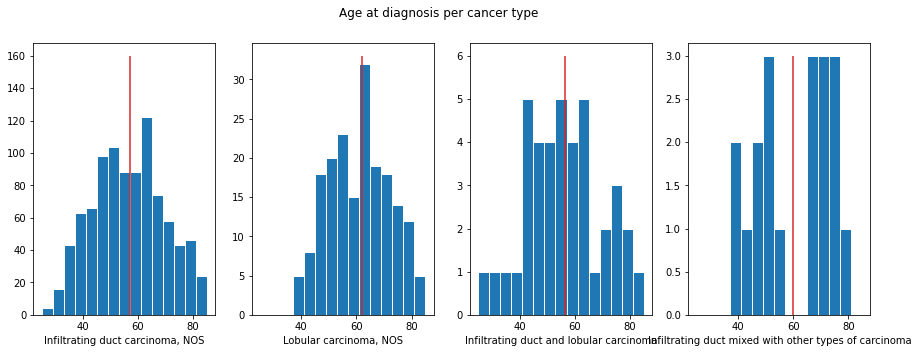

In [49]:
keys = ['Infiltrating duct carcinoma, NOS', 'Lobular carcinoma, NOS', 'Infiltrating duct and lobular carcinoma', 'Infiltrating duct mixed with other types of carcinoma']

age_and_mortality_rate_per_subtype=[]
for index, key in enumerate(keys):
    mortality = array_plot[key]["diagnoses.0.age_at_diagnosis"].mean()/365
    death_rate = array_plot[key][['case_id','demographic.vital_status']].groupby("demographic.vital_status").count()    
    if len(death_rate[death_rate.index == 'Alive'].index)>0:
        death_rate = int(death_rate[death_rate.index == 'Alive']['case_id']) / death_rate["case_id"].sum()
        age_and_mortality_rate_per_subtype.append([key, mortality, death_rate])
    else:
        age_and_mortality_rate_per_subtype.append([key, mortality])
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
fig.suptitle('Age at diagnosis per cancer type')
for index, key in enumerate(keys):
    x = array_plot[key]["diagnoses.0.age_at_diagnosis"]/365
    axes[index].hist(x,range = (25, 85), bins = 15, color = 'tab:blue', edgecolor = 'white')
    axes[index].vlines(age_and_mortality_rate_per_subtype[index][1], 0, int(len(x)/6), color='tab:red')
    #axes[index].title('Age at diagnosis')
    axes[index].set(xlabel= key)
    

In [50]:
for line in age_and_mortality_rate_per_subtype:
    #print("Type of cancer : {} --------- Agerage age at diagnosis: {:2.3}".format(line[0], line[1]))
    print(f'Cancer type : {line[0]:40} ==> Average age at diagnosis : {line[1]:2.3}')

Cancer type : Infiltrating duct carcinoma, NOS         ==> Average age at diagnosis : 57.1
Cancer type : Lobular carcinoma, NOS                   ==> Average age at diagnosis : 62.1
Cancer type : Infiltrating duct and lobular carcinoma  ==> Average age at diagnosis : 56.3
Cancer type : Infiltrating duct mixed with other types of carcinoma ==> Average age at diagnosis : 60.1


Those plots seem to show that each cancer type has a different age at diagnosis. However, to prove that it is not a statistical accident, we use a t-test to evaluate the statistical significance (p-value) of this difference.

In [51]:
# Testing that there the difference of age diagnosis is not an accident.
duct_carcimonia = (array_plot[keys[0]]["diagnoses.0.age_at_diagnosis"]/365).dropna()
lobular_carcimonia = (array_plot[keys[1]]["diagnoses.0.age_at_diagnosis"]/365).dropna()
result1, pvalue1 = stats.ttest_ind(duct_carcimonia, lobular_carcimonia, equal_var=False)
print(f"P-value1 : {pvalue1}")

P-value1 : 5.158707322496955e-07


The ductal carcinoma is significantly diagnosed at a younger age than the lobular carcinoma (p-value <0.5).


* We will now explore the different patient survival rates according to their histological types.

General survival of all breast cancer patients:


<AxesSubplot:xlabel='time'>

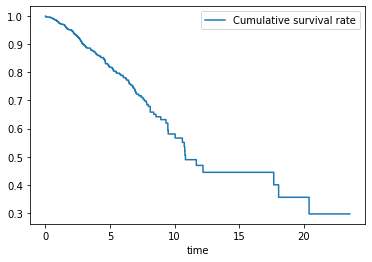

In [52]:
data_ref = df[['survivalEstimate', 'time']].copy().dropna()
data_ref = data_ref.rename(columns={"survivalEstimate": "Cumulative survival rate"})
data_ref.sort_values(by='time', ascending=False, inplace=True)
data_ref = data_ref.set_index('time')
data_ref.plot(drawstyle="steps-post")

According to the American Cancer Society (https://www.cancer.org/cancer/breast-cancer/understanding-a-breast-cancer-diagnosis/breast-cancer-survival-rates.html), the general breast cancer survival at 5 year is 90%. Our data is consistent with the general population. 

If your are interested in the story of "American Cancer Society" and the discovery of cancer and its integration into human history, we higlhy recommend you the excellent book by Prof. Siddhartha Mukherjee "The Emperor of All Maladies: A Biography of Cancer" (2011 Pulitzer Prize for General Non-Fiction)

We will now focus on survival curves as a function of each histological subtype. Indeed, we want to discover associations between our features and survival, and the histological type is used by doctors to predict whether a tumor will be more or less malignant. We will try to find this relation by comparing the survival of the most represented histological subtypes.

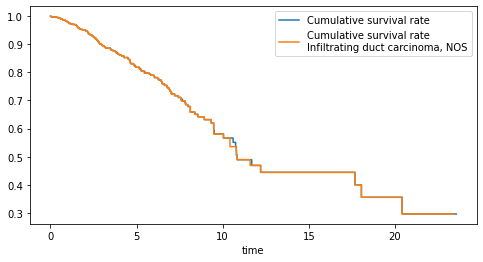

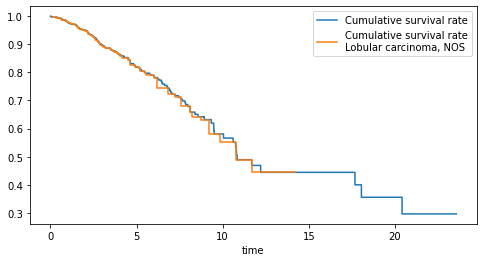

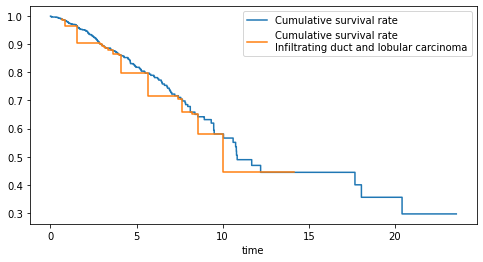

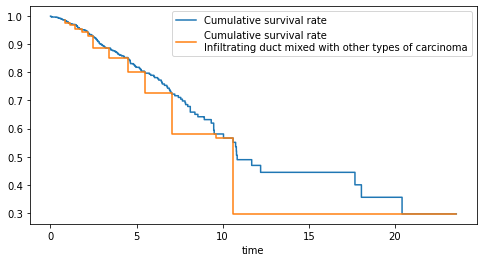

In [53]:
for k in keys:
    data = array_plot[k][['survivalEstimate', 'time']].copy()
    data = data.rename(columns={"survivalEstimate": "Cumulative survival rate\n"+k})
    data.sort_values(by='time', ascending=False, inplace=True)
    data = data.set_index('time')
    _, ax = plt.subplots(1, 1, figsize=(8, 4))
    data_ref.plot(ax=ax, drawstyle="steps-post")
    data.plot(ax=ax, drawstyle="steps-post")


In [54]:
for index, key in enumerate(keys):
    print (array_plot[key]["time"].mean())
    
result1, pvalue1 = stats.ttest_ind(array_plot[keys[0]]["time"], 
                                   array_plot[keys[1]]["time"],
                                   nan_policy='omit')
print(f"P-value1 with {keys[0]} and {keys[1]}: {pvalue1}")
result2, pvalue2 = stats.ttest_ind(array_plot[keys[0]]["time"], 
                                   array_plot[keys[2]]["time"],
                                   nan_policy='omit')
print(f"P-value2 with {keys[0]} and {keys[2]}: {pvalue2}")
result3, pvalue3 = stats.ttest_ind(array_plot[keys[1]]["time"], 
                                   array_plot[keys[2]]["time"],
                                   nan_policy='omit')
print(f"P-value3 with {keys[1]} and {keys[2]}: {pvalue3}")

3.4434673231774857
3.356869121698855
4.540627750073335
5.89489695033843
P-value1 with Infiltrating duct carcinoma, NOS and Lobular carcinoma, NOS: 0.7326318421763405
P-value2 with Infiltrating duct carcinoma, NOS and Infiltrating duct and lobular carcinoma: 0.07855594228713261
P-value3 with Lobular carcinoma, NOS and Infiltrating duct and lobular carcinoma: 0.04738169549200705


The p-value indicates us that the average difference is significant (p < 0.05) for third comparison. Thus, the cancer subtype can be considered to be included in the features in the prediction.


## Genomic Data :

As we mentionned in the data loading part, we'll focus on the 50 most mutated genes in this dataset.The histological type is characterized by the cellular morphology and a precise architecture of the cancerous tissue. These differences between these different macroscopic classifications are reflected at a smaller level, with differences within the molecular biology of these cancers. In principle we should have, for each histological type, a different genomic mutation profile. We will explore this hypothesis.



### SSM Profiles :

Is there a difference in the SSM mutation profiles for each histologic type?

In [55]:
# Get the name of columns with ssm.importance
# df = pd.read_csv('data/gdc_final_database.csv', sep=',')
threshold = 10
tumors = df["diagnoses.0.primary_diagnosis"].unique()
tumor_count = df[["case_id", "diagnoses.0.primary_diagnosis"]].groupby("diagnoses.0.primary_diagnosis").count()
relevant_tumors = list(tumor_count[tumor_count["case_id"] > threshold].index)
relevant_tumors.remove("Not Reported")
df_plot = df.filter(like='ssm.importance')
idx = df_plot.columns.values
idx = np.append(idx, 'diagnoses.0.primary_diagnosis')

# To create the dataframe we want to plot 
data = df.filter(items=idx.tolist()).dropna().groupby('diagnoses.0.primary_diagnosis').mean()
data = data.filter(items=relevant_tumors, axis=0)
data = data.rename(columns={name:name[15:] for name in data.columns})

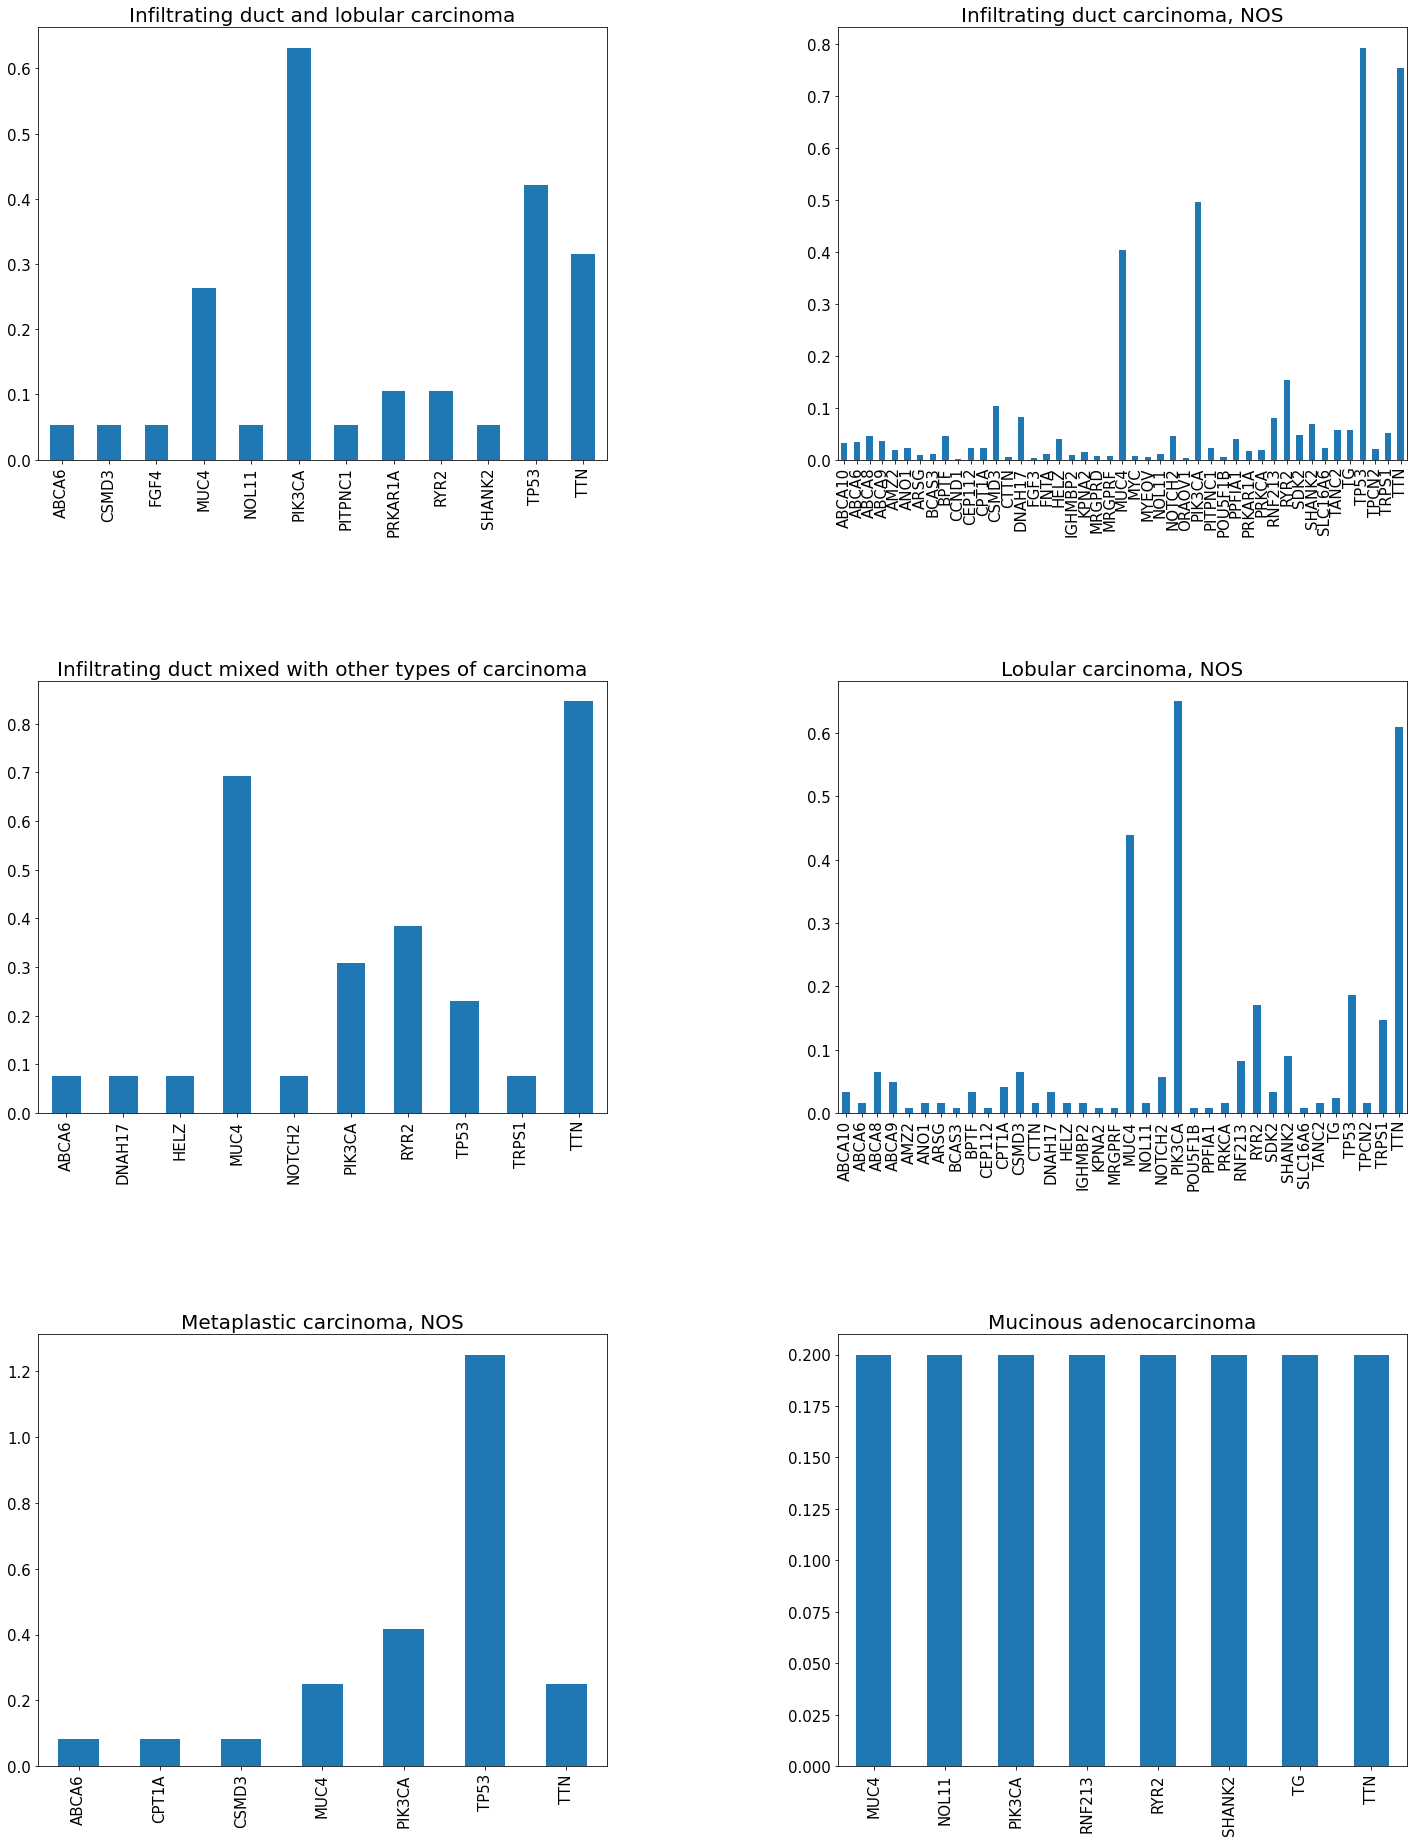

In [56]:
x = data.transpose()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize= (25,30))
fig.tight_layout(pad=20.0)

counter = 0
for i in range(0,len(axes)):
    for j in range(0,len(axes[0])):
        if counter < 6:
            a = x[x[x.columns[counter]] > 0][x.columns[counter]]
            a.plot(ax=axes[i,j], kind='bar', fontsize=15)
            axes[i, j].set_title(x.columns[counter], fontsize=20)
            counter += 1

We notice that the genes PIK3CA, TP53, MUC4, TTN are the most mutated ones in most types of cancer. Nonetheless, it seems the genetical profile (in terms of average SSM score) differs according to the cancer type.

Another question is to asses if there is a difference in the CNV mutation profiles for each histological type.

In [57]:
idx0 = df.filter(like='cnv.change').columns.values
idx = np.append(idx0, 'diagnoses.0.primary_diagnosis')

In [58]:
data = df.filter(items=idx).dropna()

In [59]:
data_gain = data.copy()
data_gain[idx0] = data_gain[idx0].apply(lambda x: x.apply(lambda y: 1. if y == "Gain" else 0.) )

data_loss = data.copy()
data_loss[idx0] = data_loss[idx0].apply(lambda x: x.apply(lambda y: 1. if y == "Loss" else 0.) )

In [60]:
data_gain_ = data_gain.groupby('diagnoses.0.primary_diagnosis').mean().filter(items=relevant_tumors, axis=0)
data_loss_ = data_loss.groupby('diagnoses.0.primary_diagnosis').mean().filter(items=relevant_tumors, axis=0)

data_gain_ = data_gain_.rename(columns={name:name[11:] for name in data_gain_.columns})
data_loss_ = data_loss_.rename(columns={name:name[11:] for name in data_loss_.columns})

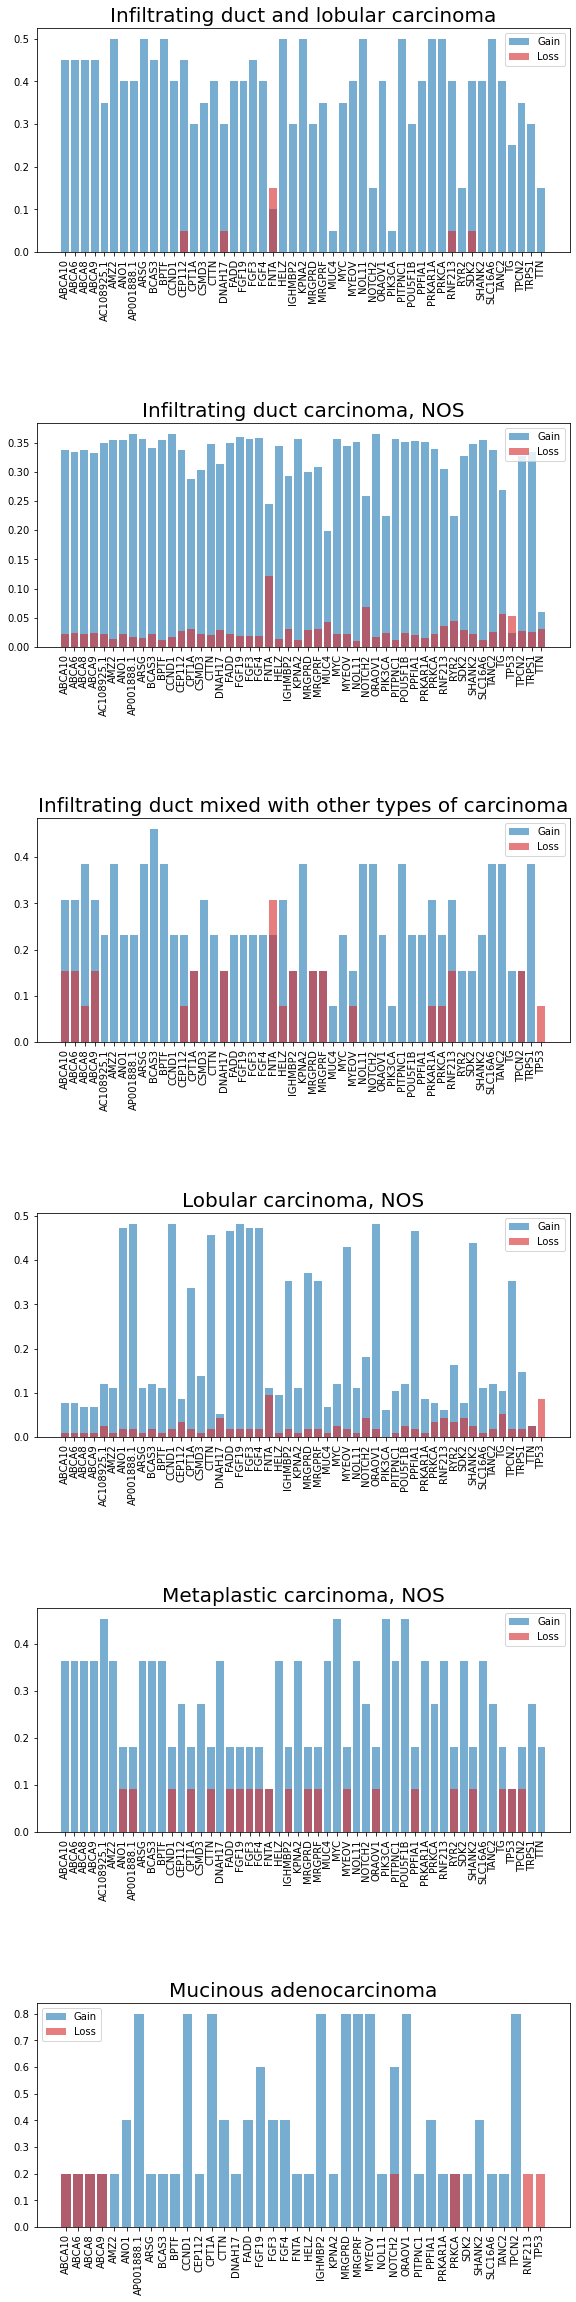

In [61]:
x_gain = data_gain_.transpose()
x_loss = data_loss_.transpose()

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(12, 35))
fig.tight_layout(pad=15.0)

counter = 0
for i in range(0, len(axes)):
    for j in range(0, 1):
        if counter < 6:
            a_gain = x_gain[x_gain[x_gain.columns[counter]] > 0][x_gain.columns[counter]]
            a_loss = x_loss[x_loss[x_loss.columns[counter]] > 0][x_loss.columns[counter]]

            axes[i].bar(x=a_gain.index, height=a_gain.values, 
                        alpha=0.6, label="Gain", color='tab:blue')
            axes[i].bar(x=a_loss.index, height=a_loss.values, 
                        alpha=0.6, label="Loss", color='tab:red')

            for tick in axes[i].get_xticklabels():
                tick.set_rotation(90)
            axes[i].set
            axes[i].set_title(x_gain.columns[counter], fontsize=20)
            axes[i].legend()
                    
            counter += 1

Changes in the number of genes are also very different from one type of cancer to another.

#### Survival vs SSM

Our goal is to predict the survival of each patient based on her personal characteristics. We will look at the impact of these mutation profiles on patient survival.

In [62]:
df_ssm_survival = pd.concat([df[df.columns[df.columns.str.startswith("ssm")]], df[["time"]]], axis=1).dropna()
time_ssm = df_ssm_survival["time"]
df_ssm_survival = df_ssm_survival.drop("time", axis=1)

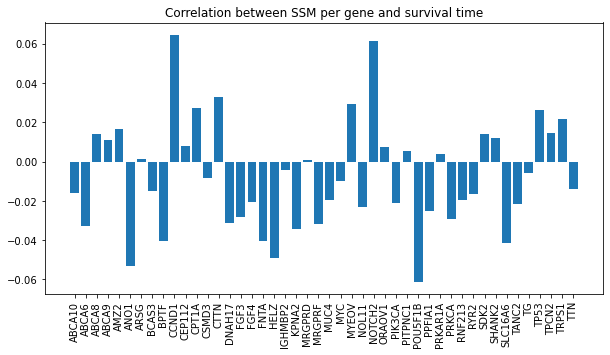

In [63]:
columns = list(df_ssm_survival.columns)[:-4]
corrs = list()
for col in columns:
    corrs.append(np.corrcoef(df_ssm_survival[col], time_ssm)[0, 1])

fig = plt.figure(figsize=(10, 5))
col_names = [x[15:] for x in columns]
plt.bar(x=col_names, height=corrs)
plt.xticks(rotation=90)
plt.title("Correlation between SSM per gene and survival time")
plt.show()

We have mutations correlated with a poor prognosis, notably POU5F1B and ANO1, which seems logical because the presence of mutations is correlated with the development of cancers.

Interestingly, we can see that mutations in the CCND1 and Notch2 genes are associated with a good prognosis. These genes have complex functions and are known to have so-called "dependent" roles. Notch2 is a gene which can, for example, be pro-tumor in certain contexts, or anti-tumor in another context. This totally fortuitous discovery in the EDA is very interesting because it supports the thesis proposed by the work in fundamental oncology of one of the team member (Louis-Oscar Morel) of the antitumoral role of the Notch protein family  in breast cancer ("Notch3 is a tumor suppressor in triple negative Breast Cancer ", Neglescu and al, in review in Cancer Research).


## Transcriptomic Data

We will now focus on transcriptomic data. How are genes expressed? Do they follow specific distributions? Are there different gene expression profiles? If so, are they correlated with the prognosis?

In [64]:
#df = pd.read_csv('data/gdc_final_database.csv', sep=',') 

# get back the arn related features.
arn_columns = df.columns[df.columns.str.startswith("arn")].sort_values() #sort to have genes in sorted order
df_arn = df[arn_columns]
visualisation_cols = df_arn.columns[6:12]

In [65]:
df_arn.head()

,arn.HTseq_counts.ABCA10,arn.HTseq_counts.ABCA6,arn.HTseq_counts.ABCA8,arn.HTseq_counts.ABCA9,arn.HTseq_counts.AC108925.1,arn.HTseq_counts.AMZ2,arn.HTseq_counts.ANO1,arn.HTseq_counts.ARSG,arn.HTseq_counts.BCAS3,arn.HTseq_counts.BPTF,...,arn.HTseq_counts.RYR2,arn.HTseq_counts.SDK2,arn.HTseq_counts.SHANK2,arn.HTseq_counts.SLC16A6,arn.HTseq_counts.TANC2,arn.HTseq_counts.TG,arn.HTseq_counts.TP53,arn.HTseq_counts.TPCN2,arn.HTseq_counts.TRPS1,arn.HTseq_counts.TTN
0,31.0,127.0,121.0,88.0,0.0,2932.0,1694.0,488.0,376.0,2349.0,...,83.0,74.0,1942.0,729.0,3846.0,18.0,2997.0,655.0,8320.0,341.0
1,21.0,143.0,26.0,68.0,0.0,13775.0,2622.0,1024.0,1966.0,9583.0,...,34.0,266.0,1274.0,700.0,9455.0,19.0,6779.0,1123.0,13940.0,306.0
2,1605.0,2119.0,2762.0,3148.0,0.0,3494.0,12930.0,2011.0,1760.0,6451.0,...,177.0,528.0,2830.0,880.0,5889.0,56.0,4543.0,3168.0,15170.0,1334.0
3,1116.0,2908.0,2180.0,1674.0,0.0,8505.0,13333.0,5802.0,4605.0,27177.0,...,418.0,603.0,6459.0,12415.0,17324.0,391.0,7822.0,1206.0,212884.0,19495.0
4,6.0,119.0,71.0,44.0,0.0,5016.0,28141.0,1404.0,3775.0,12229.0,...,29.0,37.0,4405.0,1289.0,15729.0,20.0,5374.0,2801.0,40581.0,244.0


Distribution for the first 6 genes in alphabetical order for all patients.

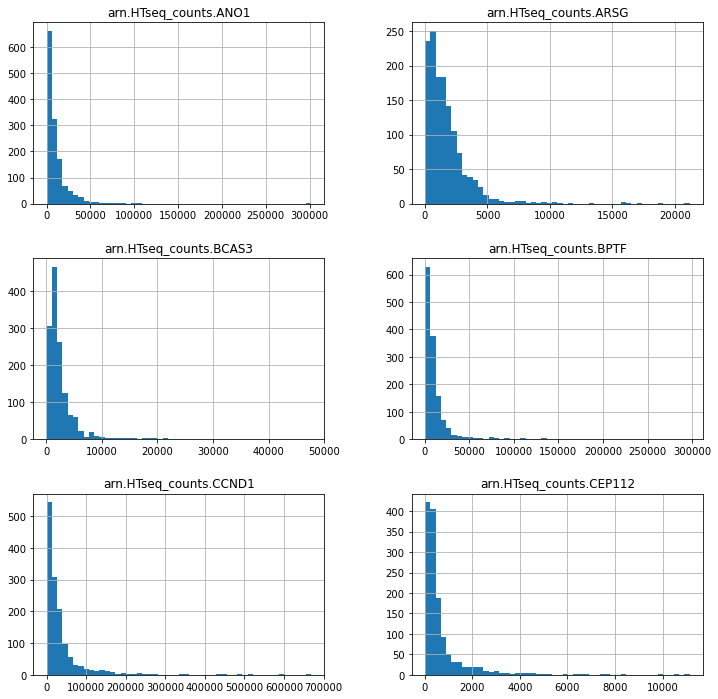

In [66]:
df_arn.hist(visualisation_cols, bins=50, figsize=(12, 12),layout=(3,2));

Each gene counts follows a pseudo Poisson Law. Most importantly, 
* Features are positive and definitely not gaussian distributed. 
* Features are not evenly spread, nor do they have the same average level of expression.

#### RNA and CNV

mRNA expression is (very likely) linked to the cvn nature ( "gain" / "loss" / "none" ). Let's check the effet.

In [67]:
cnv_columns = df.columns[df.columns.str.startswith("cnv")].sort_values()

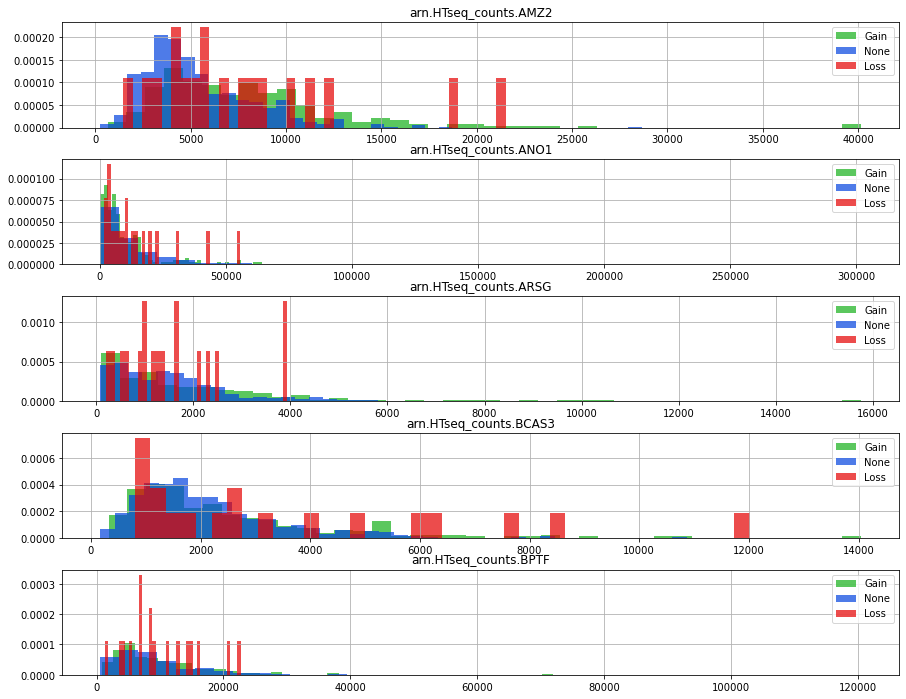

In [68]:
n_genes = 5
fig, axes = plt.subplots(n_genes, 1, figsize=(15, 12))
for cnv, arn, ax in zip(cnv_columns[0:0+n_genes], arn_columns[n_genes:n_genes+n_genes], axes.ravel()):
    #note: select one by one to be able to choose the color on the graph.
    df[[cnv, arn]][df[cnv]=="Gain"].hist(ax=ax,
                                         density=True, bins=40, color="xkcd:green", 
                                         alpha=0.7, label="Gain", 
                                         histtype="bar")
    df[[cnv, arn]][df[cnv]=="None"].hist(ax=ax,
                                         density=True, bins=40, color="xkcd:blue", 
                                         alpha=0.7, label="None",
                                        histtype="bar")
    df[[cnv, arn]][df[cnv]=="Loss"].hist(ax=ax, 
                                         density=True, bins=40, color="xkcd:red", 
                                         alpha=0.7, label="Loss",
                                        histtype="bar")
    ax.legend();

We can see that indeed, depending on the type of cnv, the RNA levels distributions are slighly different. The MAP for the "Gain" cnv seems to be higher than for "None" and "Loss".

In [69]:
main_hist = ['Infiltrating duct carcinoma, NOS', 'Lobular carcinoma, NOS']
dfs = {}
for cancer_type in main_hist:
    dfs[cancer_type] = (df[df["diagnoses.0.primary_diagnosis"] == cancer_type])

##### Heatmap of the correlation between gene expression according to the tumor type

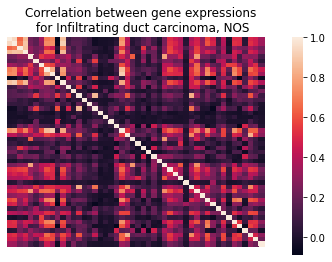

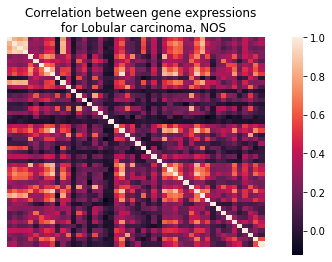

In [70]:
import seaborn as sns
for hist in main_hist:
    df_hist_arn = dfs[hist][dfs[hist].columns[dfs[hist].columns.str.startswith("arn")]]
    plt.title("Correlation between gene expressions\n for "+hist)
    sns.heatmap(df_hist_arn.corr(), xticklabels=False, yticklabels=False)
    plt.show()

The correlation matrix of the expression interaction between genes shows a slight difference. There are more dark (less correlated) areas in the "Infiltrating duct carcinoma" case, whereas there are are more light (more correlated) areas in the "Lobular carcinoma" case. It is an indication there might be  different espressivity patterns, including different genes for the different tumor types.

Survival vs HTSeqcount

In [71]:
df_rna_survival = pd.concat([df[df.columns[df.columns.str.startswith("arn")]], df[["time"]]], axis=1).dropna()
time_rna = df_rna_survival["time"]
df_rna_survival = df_rna_survival.drop("time", axis=1)

In [72]:
columns = list(df_rna_survival.columns)[:-4]
corrs = list()
for col in columns:
    corrs.append(np.corrcoef(df_rna_survival[col], time_rna)[0, 1])

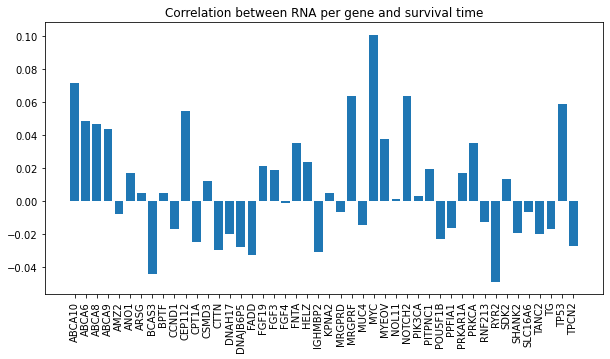

In [73]:
fig = plt.figure(figsize=(10, 5))
col_names = [x[17:] for x in columns]
plt.bar(x=col_names, height=corrs)
plt.xticks(rotation=90)
plt.title("Correlation between RNA per gene and survival time")
plt.show()

As for the genomic data, gene expression is correlated with the survival. Some mRNA are correlated with good survival, some not. We could say many things about the molecular interpretation of this graph, but the most inmportant information is to get the intuition that mRNA expression will have an impact on the survival prediction.

We can compare both correlations of survival with SSM and HTSeqCount:

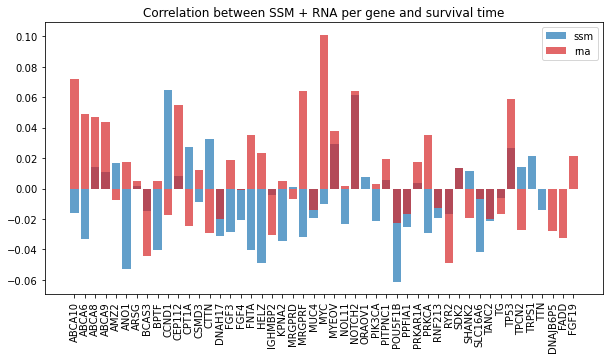

In [74]:
columns_rna = list(df_rna_survival.columns)[:-4]
corrs_rna = list()
for col in columns_rna:
    corrs_rna.append(np.corrcoef(df_rna_survival[col], time_rna)[0, 1])

columns_ssm = list(df_ssm_survival.columns)[:-4]
corrs_ssm = list()
for col in columns_ssm:
    corrs_ssm.append(np.corrcoef(df_ssm_survival[col], time_ssm)[0, 1])

fig = plt.figure(figsize=(10, 5))
col_names_ssm = [x[15:] for x in columns_ssm]
col_names_rna = [x[17:] for x in columns_rna]
plt.bar(x=col_names_ssm, height=corrs_ssm, label="ssm", alpha=0.7, color='tab:blue')
plt.bar(x=col_names_rna, height=corrs_rna, label="rna", alpha=0.7, color='tab:red')
plt.xticks(rotation=90)
plt.title("Correlation between SSM + RNA per gene and survival time")
plt.legend()
plt.show()

This graph compares the correlation between survival and ssm mutation/RNAexpression. We wanted to see if the mutation profiles were over-lapping with mRNA expression. As we can see, both techniques gives different informations for the survival and are therefore not redondant. 

Is the gene expression able to discriminate the histological types ? To see if we could cluster the histological types according to the genomique expression, we performed a T-SNE clustering.

In [75]:
from sklearn.manifold import TSNE
from collections import defaultdict

In [76]:
threshold = 5
tumors = df["diagnoses.0.primary_diagnosis"].unique()
tumor_count = df[["case_id", "diagnoses.0.primary_diagnosis"]].groupby("diagnoses.0.primary_diagnosis").count()
relevant_tumors = list(tumor_count[tumor_count["case_id"] > threshold].index)
df_tsne = df[df["diagnoses.0.primary_diagnosis"].isin(relevant_tumors)]
df_tsne_arn = df_tsne[df_tsne.columns[df_tsne.columns.str.startswith("arn")]]

In [77]:
Y = TSNE().fit_transform(df_tsne_arn.dropna())

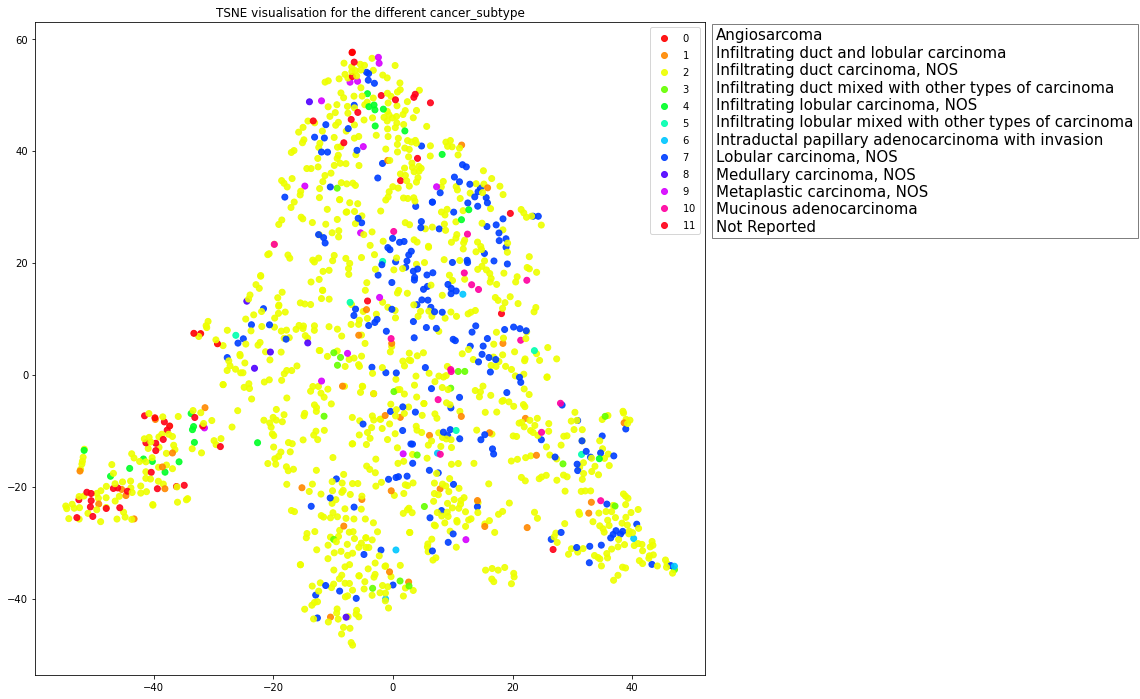

In [84]:
sub_cancer_to_color = {
    cancer_name: i
    for i, cancer_name in enumerate(relevant_tumors)
}
c = df_tsne[df_tsne_arn.isna().sum(axis=1) == 0]["diagnoses.0.primary_diagnosis"].map(sub_cancer_to_color).to_numpy()
plt.figure(figsize=(12, 12))
scatter = plt.scatter(Y[:,0], Y[:,1], c=c, alpha=0.9, cmap="hsv")
plt.title("TSNE visualisation for the different cancer_subtype")
plt.legend(*scatter.legend_elements(num=len(sub_cancer_to_color)), loc='upper right' )
text_plot = "\n".join(relevant_tumors)
plt.text(54, 62, text_plot, fontsize=15,
        verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.show()

We perform [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE.fit_transform) on the 50 ARN variables and color depending on the cancer subtype. Some structure, although not obvious appears. We can see for instance a branch forming a cluster of red/orange/pink/turquoise points. 

Thus, the transcriptomic profile makes it possible to clearly distinguish the angiosarcomas from the rest of the tumors, which is consistent with regard to the great biological difference of this cancer with the rest in cancer presented here. We could also try a UMAP to identify other interesting clusters. 

This clustering shows that RNA expression gives great informations on histological types.



##### deal with nan

There are 6 cases with missing arn data. Because there is still clinical and genomic information, we will keep then and impute them with the mean. This will be done as part of the estimator pipeline.

In [85]:
df_arn.loc[(df_arn.isna().sum(axis=1) > 0)]

,arn.HTseq_counts.ABCA10,arn.HTseq_counts.ABCA6,arn.HTseq_counts.ABCA8,arn.HTseq_counts.ABCA9,arn.HTseq_counts.AC108925.1,arn.HTseq_counts.AMZ2,arn.HTseq_counts.ANO1,arn.HTseq_counts.ARSG,arn.HTseq_counts.BCAS3,arn.HTseq_counts.BPTF,...,arn.HTseq_counts.RYR2,arn.HTseq_counts.SDK2,arn.HTseq_counts.SHANK2,arn.HTseq_counts.SLC16A6,arn.HTseq_counts.TANC2,arn.HTseq_counts.TG,arn.HTseq_counts.TP53,arn.HTseq_counts.TPCN2,arn.HTseq_counts.TRPS1,arn.HTseq_counts.TTN
8,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
414,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
519,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
958,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Submission

Travail de prédiction :


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, Ridge, Lasso

In [87]:
df = pd.read_csv("./data/gdc_final_database.csv")
df.drop("Unnamed: 0", inplace=True, axis=1)

np.random.seed(0)
data_train, data_test = train_test_split(df, train_size=1000)

## Primary objective : Histological category prediction

In [88]:
y = data_train[["diagnoses.0.primary_diagnosis"]]
X = data_train.drop(["time", "diagnoses.0.primary_diagnosis", "survivalEstimate", "case_id", 
                     "id_x", "id_y", 'diagnoses.0.days_to_last_follow_up'], axis=1)

idxs = -y["diagnoses.0.primary_diagnosis"].isna()

X_train, X_test, y_train, y_test = train_test_split(X.loc[idxs], y.loc[idxs], test_size=0.25)

In [89]:
cat_cols = list()
num_cols = list()
bool_cols = list()

for col in set(X_train.columns):
#     print(col, '\t', X_train[col].dtype, '\t', X_train[col].dtype == object)
    if col.endswith("is_ffpe"):
        bool_cols.append(col)
    elif X_train[col].dtype == object:
        cat_cols.append(col)
    elif  X_train[col].dtype == np.float64:
        num_cols.append(col)
    else:
        print(X_train[col].dtype)

In [90]:
cat_pipeline = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'),
)
bool_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent', fill_value='missing'),
    OrdinalEncoder(),
)
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'))

preprocessing = make_column_transformer(
    (cat_pipeline, cat_cols),
    (num_pipeline, num_cols),
    (bool_pipeline, bool_cols)
)
model = make_pipeline(
    preprocessing,
    RidgeClassifier(alpha=1.)
)

In [91]:
model.fit(X_train, y_train.to_numpy().ravel())
model.score(X_train, y_train)

0.9719626168224299

In [92]:
model.score(X_test, y_test)

0.944

## Secondary objective : Survival prediction

In [93]:
y = data_train[["time"]]
X = data_train.drop(["time", "survivalEstimate", "case_id", 
                     "id_x", "id_y", 'diagnoses.0.days_to_last_follow_up'], axis=1)

idxs = -y["time"].isna()

X_train, X_test, y_train, y_test = train_test_split(X.loc[idxs], y.loc[idxs], test_size=0.25)

In [94]:
cat_cols = list()
num_cols = list()
bool_cols = list()

for col in set(X_train.columns):
#     print(col, '\t', X_train[col].dtype, '\t', X_train[col].dtype == object)
    if col.endswith("is_ffpe"):
        bool_cols.append(col)
    elif X_train[col].dtype == object:
        cat_cols.append(col)
    elif  X_train[col].dtype == np.float64:
        num_cols.append(col)
    else:
        print(X_train[col].dtype)

In [95]:
cat_pipeline = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'),
)
bool_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent', fill_value='missing'),
    OrdinalEncoder(),
)
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'))

preprocessing = make_column_transformer(
    (cat_pipeline, cat_cols),
    (num_pipeline, num_cols),
    (bool_pipeline, bool_cols)
)
model = make_pipeline(
    preprocessing,
    RandomForestRegressor(n_estimators=100),
)

In [96]:
model.fit(X_train, y_train.to_numpy().ravel())
model.score(X_train, y_train)

0.9410616109031069

In [97]:
model.score(X_test, y_test)

0.6873007691237492

In [98]:
model.predict(X_test)[:10]

array([1.89180014, 9.87296372, 2.67874059, 1.48591376, 1.54735113,
       6.08908966, 1.50193018, 1.76079398, 7.79383984, 2.09371663])

In [99]:
y_test.to_numpy()[:10].ravel()

array([ 1.11704312, 19.45516769,  5.07871321,  0.87611225,  1.62902122,
        6.80629706,  1.3798768 ,  3.39219713,  5.97946612,  4.49007529])